In [1]:
# read the file and connect to google drive file
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# path for the data
path="/content/drive/MyDrive/amr/data.csv" # you can replace this with your data path
df = pd.read_csv(path)
df.set_index("Isolate Id", inplace=True)

<ipython-input-3-a283386f23f6>:3: DtypeWarning: Columns (5,10,19,20,23,24,29,30,35,36,43,44,45,46,55,56,57,58,59,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,101,102,103,117,120,122,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [4]:
# Inspect first few rows of data
df.head()

Study                 Species                  Family Country  \
Isolate Id                                                                 
1000000     TEST  Pseudomonas aeruginosa  Non-Enterobacteriaceae  France   
1000001     TEST  Pseudomonas aeruginosa  Non-Enterobacteriaceae  France   
1000002     TEST  Pseudomonas aeruginosa  Non-Enterobacteriaceae  France   
1000003     TEST  Pseudomonas aeruginosa  Non-Enterobacteriaceae  France   
1000004     TEST     Serratia marcescens      Enterobacteriaceae  France   

           State  Gender       Age Group            Speciality Source  \
Isolate Id                                                              
1000000      NaN    Male     85 and Over        Emergency Room  Urine   
1000001      NaN  Female  13 to 18 Years        Emergency Room    Ear   
1000002      NaN  Female  65 to 84 Years  Nursing Home / Rehab  Urine   
1000003      NaN    Male  19 to 64 Years      Medicine General   Skin   
1000004      NaN    Male  19 to 64 Years      Medicine General  Blood   

           In / Out Patient  ...  DHA  FOX ACTMIR  KPC  OXA  NDM  IMP  VIM  \
Isolate Id                   ...                                             
1000000          None Given  ...  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   
1000001          None Given  ...  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   
1000002          None Given  ...  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   
1000003          None Given  ...  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   
1000004          None Given  ...  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   

            SPM  GIM  
Isolate Id            
1000000     NaN  NaN  
1000001     NaN  NaN  
1000002     NaN  NaN  
1000003     NaN  NaN  
1000004     NaN  NaN  

[5 rows x 125 columns]

In [5]:
# GEt data categories
df["Study"].unique()

array(['TEST', 'Inform', 'Atlas', 'SPIDAAR'], dtype=object)

In [6]:
# Get each data category info
df_test=df.groupby("Study").get_group("TEST")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413245 entries, 1000000 to 999999
Columns: 125 entries, Study to GIM
dtypes: float64(6), int64(1), object(118)
memory usage: 397.3+ MB


In [7]:
# Get the countries covered
df_test["Country"].unique()

array(['France', 'Spain', 'Belgium', 'Italy', 'Germany', 'Canada',
       'United States', 'Ireland', 'Portugal', 'United Kingdom',
       'Switzerland', 'Colombia', 'Chile', 'Finland', 'Mexico', 'Sweden',
       'Denmark', 'Croatia', 'Poland', 'Netherlands', 'Romania',
       'Hungary', 'Czech Republic', 'Panama', 'Greece', 'South Africa',
       'Brazil', 'Kuwait', 'Jordan', 'Saudi Arabia', 'Taiwan',
       'Philippines', 'Pakistan', 'Venezuela', 'Korea, South',
       'Guatemala', 'Thailand', 'Morocco', 'Malaysia', 'India', 'China',
       'Argentina', 'Singapore', 'Vietnam', 'Hong Kong', 'Australia',
       'Japan', 'Latvia', 'Lithuania', 'Austria', 'Turkey', 'Serbia',
       'Lebanon', 'Jamaica', 'Israel', 'Norway', 'Honduras',
       'Puerto Rico', 'Slovenia', 'Nicaragua', 'Slovak Republic', 'Oman',
       'Namibia', 'Indonesia', 'Bulgaria', 'Mauritius', 'Estonia',
       'El Salvador', 'Tunisia', 'Egypt'], dtype=object)

In [8]:
# Get year coverage
df_test["Year"].unique()

array([2013, 2012, 2014, 2011, 2015, 2009, 2017, 2016, 2004, 2005, 2007,
       2006, 2010, 2008])

In [9]:
# Get each data category info
df_Inform=df.groupby("Study").get_group("Inform")
df_Inform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219885 entries, 1007502 to 999941
Columns: 125 entries, Study to GIM
dtypes: float64(6), int64(1), object(118)
memory usage: 211.4+ MB


In [10]:
# get missing values per column
df_Inform.isna().sum()

Study           0
Species         0
Family          0
Country         0
State      198451
            ...  
NDM        194258
IMP        194258
VIM        194258
SPM        194258
GIM        201961
Length: 125, dtype: int64

In [11]:
df_Inform["Country"].unique()

array(['Israel', 'United States', 'Greece', 'China', 'Spain', 'France',
       'Kuwait', 'Poland', 'Hungary', 'Ireland', 'Austria', 'Germany',
       'Australia', 'United Kingdom', 'Denmark', 'Sweden', 'Hong Kong',
       'Japan', 'Malaysia', 'Nigeria', 'Kenya', 'Czech Republic',
       'Russia', 'Netherlands', 'Portugal', 'Venezuela', 'Chile',
       'Thailand', 'Philippines', 'Mexico', 'Turkey', 'Italy',
       'Korea, South', 'South Africa', 'Belgium', 'Argentina', 'Taiwan',
       'Colombia', 'Romania', 'Brazil'], dtype=object)

In [12]:
df_Inform["Year"].unique()

array([2013, 2014, 2015, 2016, 2017, 2012])

In [13]:
# Get each data category info
df_Atlas=df.groupby("Study").get_group("Atlas")
df_Atlas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224867 entries, 1773105 to 2572009
Columns: 125 entries, Study to GIM
dtypes: float64(6), int64(1), object(118)
memory usage: 216.2+ MB


In [14]:
# Get each data category info
df_Atlas.isna().sum()

Study           0
Species         0
Family          0
Country         0
State      201854
            ...  
NDM        203927
IMP        203927
VIM        203927
SPM        203927
GIM        203927
Length: 125, dtype: int64

In [15]:
# get the year coverage
df_Atlas["Year"].unique()

array([2018, 2019, 2020, 2021])

In [16]:
df_Atlas["Country"].unique()

array(['Spain', 'Mexico', 'United States', 'Israel', 'Czech Republic',
       'Colombia', 'Taiwan', 'Hungary', 'Belgium', 'France',
       'Philippines', 'Korea, South', 'China', 'Greece', 'India',
       'South Africa', 'Portugal', 'Lithuania', 'United Kingdom',
       'Latvia', 'Italy', 'Dominican Republic', 'Germany', 'Australia',
       'Venezuela', 'Panama', 'Finland', 'Canada', 'Japan', 'Switzerland',
       'Netherlands', 'Costa Rica', 'Thailand', 'Brazil', 'Hong Kong',
       'Nigeria', 'Croatia', 'Turkey', 'Argentina', 'Poland', 'Denmark',
       'Chile', 'Singapore', 'Ireland', 'Guatemala', 'Sweden',
       'Saudi Arabia', 'Kuwait', 'Ukraine', 'Romania', 'Russia',
       'Morocco', 'Jordan', 'Malaysia', 'New Zealand', 'Qatar',
       'Ivory Coast', 'Cameroon', 'Slovenia'], dtype=object)

In [17]:
# Select rows based on values in a column
selected_data = df[df['Study'] == 'Atlas']


In [18]:
# inspect the shape of the dataframe
selected_data.shape

(224867, 125)

In [19]:
# check for null values
selected_data.isna().sum()

Study           0
Species         0
Family          0
Country         0
State      201854
            ...  
NDM        203927
IMP        203927
VIM        203927
SPM        203927
GIM        203927
Length: 125, dtype: int64

In [20]:
# Drop columns with complete missingness
df_dropped = selected_data.dropna(axis=1, how='all')

In [21]:
# check the size of dataframe after dropping columns with cmplete missingness
df_dropped.shape

(224867, 101)

In [22]:
# checj the remaining columns after dropping
df_dropped.columns

Index(['Study', 'Species', 'Family', 'Country', 'State', 'Gender', 'Age Group',
       'Speciality', 'Source', 'In / Out Patient',
       ...
       'DHA', 'FOX', 'ACTMIR', 'KPC', 'OXA', 'NDM', 'IMP', 'VIM', 'SPM',
       'GIM'],
      dtype='object', length=101)

In [23]:
# Drop columns by specifying their names
columns_to_drop = ['Aztreonam avibactam', 'Cefoperazone sulbactam']
df_dropped = df_dropped.drop(columns=columns_to_drop)


In [24]:
# updated columns after dropping above colums
df_dropped.columns

Index(['Study', 'Species', 'Family', 'Country', 'State', 'Gender', 'Age Group',
       'Speciality', 'Source', 'In / Out Patient', 'Year', 'Phenotype',
       'Amikacin', 'Amikacin_I', 'Amoxycillin clavulanate',
       'Amoxycillin clavulanate_I', 'Ampicillin', 'Ampicillin_I',
       'Azithromycin', 'Azithromycin_I', 'Cefepime', 'Cefepime_I', 'Cefoxitin',
       'Cefoxitin_I', 'Ceftazidime', 'Ceftazidime_I', 'Ceftriaxone',
       'Ceftriaxone_I', 'Clindamycin', 'Clindamycin_I', 'Erythromycin',
       'Erythromycin_I', 'Imipenem', 'Imipenem_I', 'Levofloxacin',
       'Levofloxacin_I', 'Linezolid', 'Linezolid_I', 'Meropenem',
       'Meropenem_I', 'Metronidazole', 'Metronidazole_I', 'Penicillin',
       'Penicillin_I', 'Piperacillin tazobactam', 'Piperacillin tazobactam_I',
       'Tigecycline', 'Tigecycline_I', 'Vancomycin', 'Vancomycin_I',
       'Ampicillin sulbactam', 'Ampicillin sulbactam_I', 'Aztreonam',
       'Aztreonam_I', 'Ceftaroline', 'Ceftaroline_I', 'Ceftazidime avibactam',

In [25]:
# install  package that get countries codes and assign them to their continents
! pip install pycountry_convert

In [76]:
# Get continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Function to get continent from country name
def get_continent(country_name):
    try:
        # Convert country name to country code (alpha-2)
        if  country_name=="Korea, South":
          country_code = country_name_to_country_alpha2("South Korea")
          continent_code = country_alpha2_to_continent_code(country_code)
        else:
          # Convert country code to continent code
          country_code = country_name_to_country_alpha2(country_name)
         # Convert country code to continent code
          continent_code = country_alpha2_to_continent_code(country_code)
        return continent_code
    except:

        return 'Unknown'

# Add a new column for 'Continent' to the DataFrame
df_dropped['Continent'] = df_dropped['Country'].apply(get_continent)
df_dropped["Country"].isna().sum()

0

In [27]:
# Get unique values
df_dropped["Continent"].unique()

array(['EU', 'NA', 'AS', 'SA', 'AF', 'OC'], dtype=object)

In [28]:
# Dataframe with Drug resistance profiles and Continents
important_data_continent = df_dropped.drop(columns=["Study","Species","Age Group",'In / Out Patient','Phenotype','Year',"State","Family","Country","Gender","Speciality","Source"])

In [29]:
# Dataframe with Drug resistance profiles and Continents
important_data_age = df_dropped.drop(columns=["Study","Species","Country",'In / Out Patient','Phenotype','Year',"State","Family","Gender","Speciality","Source"])

In [30]:
# Install package for dimentionality reduction for the categorical data
! pip install prince

In [81]:
import prince
from sklearn.cluster import KMeans
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def KNN_clustering(data_input, column, seed=42):
    # Set the seed for reproducibility
    random.seed(seed)
    np.random.seed(seed)

    # Calculate the percentage of missing values in each column
    missing_percentages = data_input.isnull().mean() * 100

    # Identify columns with more than 40% missingness
    columns_to_drop = missing_percentages[missing_percentages > 40].index

    # Drop the identified columns
    df_dropped = data_input.drop(columns=columns_to_drop)
    imputed_data = pd.get_dummies(df_dropped)

    # Reduce Dimensionality
    mca = prince.MCA()
    mca.fit(imputed_data)
    count = 1

    # Analyze eigenvalues and cumulative explained variance
    eigenvalues = mca.eigenvalues_
    total_variance = sum(eigenvalues)
    explained_variance_ratio = eigenvalues / total_variance
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Determine the number of components for at least 90% cumulative explained variance
    num_components_to_retain = np.argmax(cumulative_variance_ratio >= 0.9) + 1

    # Create new MCA object with the desired number of components
    reduced_mca = prince.MCA(n_components=num_components_to_retain)

    # Fit the new MCA object to your data
    reduced_mca.fit(imputed_data)

    # Transform your data to obtain the reduced-dimensional representation
    reduced_data = reduced_mca.transform(imputed_data)

    # Save to CSV
    reduced_data.to_csv(f"/content/drive/MyDrive/amr/{column}.csv")

    # Clustering
    kmeans = KMeans(n_clusters=3, max_iter=600, algorithm='auto')
    fitted = kmeans.fit(reduced_data)

    # Get the cluster labels
    prediction = kmeans.predict(reduced_data)

    # Set the seed for reproducibility in plotting
    random.seed(seed)
    np.random.seed(seed)

    # Plot the scatter plot of the reduced data with cluster assignments
    plt.scatter(reduced_data.values[:, 0], reduced_data.values[:, 1], c=prediction, s=50, cmap='viridis')

    # Add one label for each cluster
    for label in set(prediction):
        # Find the first index of the cluster label
        index = prediction.tolist().index(label)
        # Add the label as a text annotation at the corresponding data point
        plt.text(reduced_data.values[index, 0], reduced_data.values[index, 1], str(label), ha='center', va='center')

    # Plot the cluster centers
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)

    # Remove the duplicate legend entries
    plt.legend().remove()

    # Save the figure to a file
    plt.savefig(f"/content/drive/MyDrive/amr/{column}.png")

    # Show the plot
    plt.show()

    # Create a new DataFrame with the original data and cluster labels
    data_with_clusters = pd.DataFrame(data=data_input, columns=data_input.columns)
    data_with_clusters['Cluster'] = prediction

    # Group the data by the provided column
    grouped_data = data_with_clusters.groupby(column)

    # Return a dictionary of dataframes, with each dataframe representing a group
    grouped_data_dict = {}
    for group, group_data in grouped_data:
        # Create a new DataFrame with the one-hot encoded columns and cluster labels for the group
        group_data_with_columns = pd.get_dummies(group_data)
        grouped_data_dict[group] = group_data_with_columns

    return grouped_data_dict, data_with_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


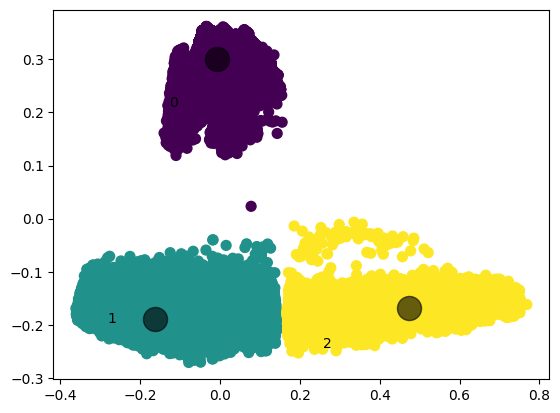

In [43]:
# group of datframes and data with clusters
df,clusters_data=KNN_clustering(important_data_continent,"Continent")

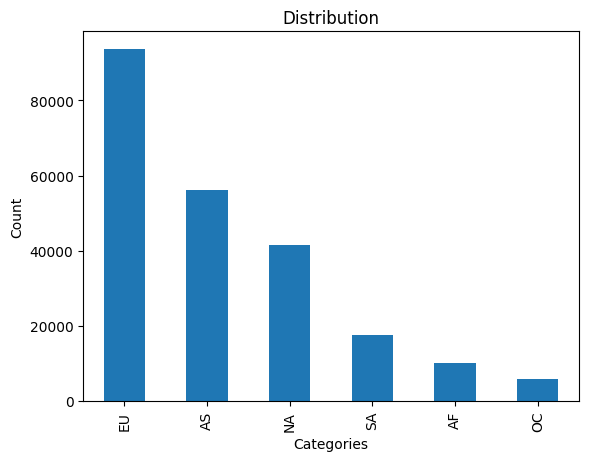

In [45]:
# Distribution
# Calculate the distribution of continent_data
distribution = important_data_continent['Continent'].value_counts()
# Plot the distribution
plt.figure()
distribution.plot(kind='bar')
plt.title(f"Distribution")
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [69]:
import matplotlib.pyplot as plt
def Resistance_Visualization(drugs_list,data_with_clusters,continent):
    import random
    import matplotlib.colors as mcolors

    selected_columns = []

    for drug in drugs_list:
        resistance_column = drug + '_I_Resistant'
        susceptible_column = drug + '_I_Susceptible'
        intermediate_column = drug + '_I_Intermediate'

        # Check if any of the three columns exist in the dataset
        if any(column in data_with_clusters.columns for column in [resistance_column, susceptible_column, intermediate_column]):
            selected_columns.extend([resistance_column, susceptible_column, intermediate_column])
        else:
            print(f"Skipping {drug} as all columns are missing.")

    # Check if any columns were selected
    if not selected_columns:
        print("No columns were selected. Aborting visualization.")
        return

    drug_resistance_columns = selected_columns

    resistance_data = data_with_clusters[['Cluster'] + drug_resistance_columns]

    drug_resistance_counts = resistance_data.groupby('Cluster').sum()

    total_counts = drug_resistance_counts.sum(axis=1)
    print(total_counts)
    # Get the total number of categories
    num_categories = len(selected_columns)

    # Generate a random sample of distinct colors from CSS4_COLORS
    colors = ['#73020C', '#426A8C', '#D94D1A',"#FF0000","#FFFF00","#00FF00","#000000","#00FFFF","#0000FF"]

    category_colors = dict(zip(selected_columns, colors))
    plt.figure(figsize=(80, 50))
    try:
      drug_resistance_counts.plot(kind='bar', color=category_colors)
      plt.title(f'Drug-Resistant Profiles Per cluster for {continent}')
      plt.xlabel('Cluster')
      plt.ylabel('Count')
      plt.xticks(rotation=0)
      plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))
      plt.savefig(f"/content/drive/MyDrive/amr/{drugs_list[0]}_{continent}.png")
      plt.show()

    except:
      print("no key found")


In [ ]:
#'Aminoglycosides': ['Amikacin', 'Gentamicin'],
  #Beta-lactam/BLI Combinations': ['Amoxycillin clavulanate', 'Piperacillin tazobactam', 'Ampicillin sulbactam'],

  # Cephalosporins': ['Cefepime', 'Ceftazidime', 'Ceftaroline', 'Ceftazidime avibactam'],
  # Carbapenems': ['Imipenem', 'Meropenem'],
  # Fluoroquinolones': ['Levofloxacin', 'Ciprofloxacin'],
  # Tetracyclines': ['Tigecycline'],
  # Colistin': ['Colistin'],
  # 'Other':'Aztreonam', 'Trimethoprim sulfa']

# Drug Resistance Profiles  per Continent per Cluster
##  Aminoglycosides
- Amikacin', 'Gentamicin

Cluster
0    2058
1    8470
2    4964
dtype: int64


<Figure size 8000x5000 with 0 Axes>

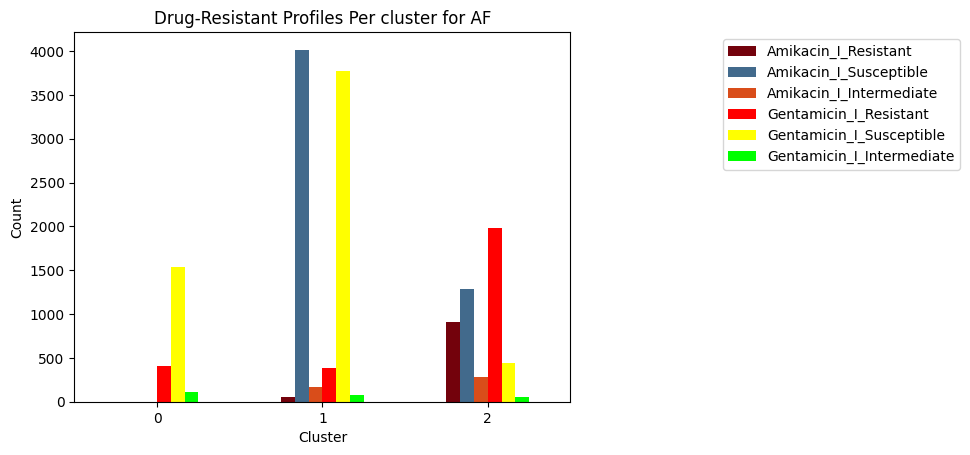

Cluster
0    10472
1    49008
2    25278
dtype: int64


<Figure size 8000x5000 with 0 Axes>

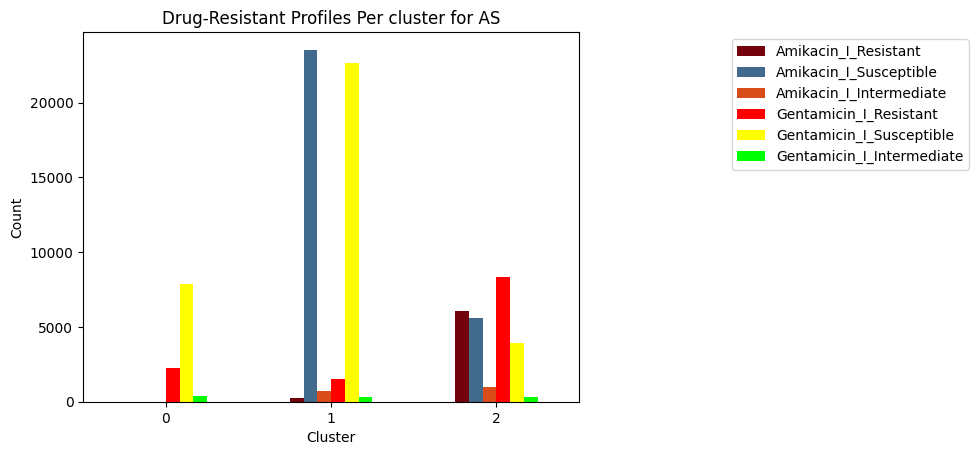

Cluster
0    17963
1    85542
2    24818
dtype: int64


<Figure size 8000x5000 with 0 Axes>

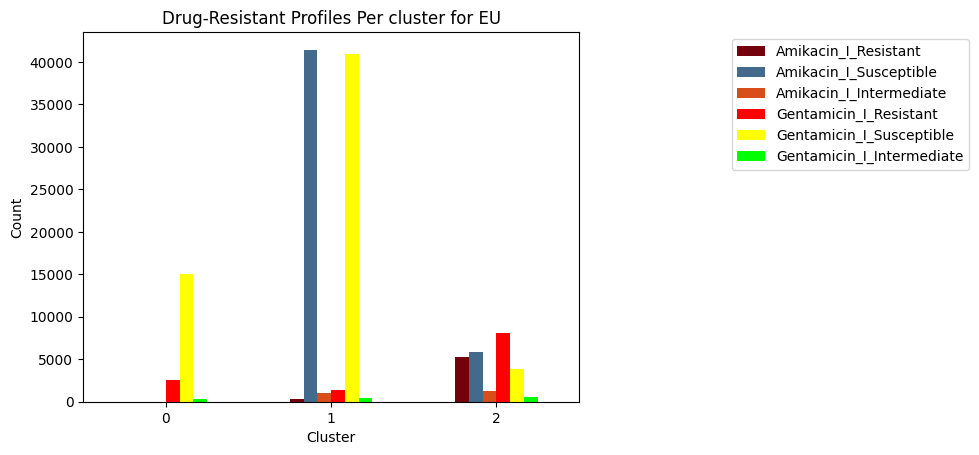

Cluster
0     8044
1    41481
2     9598
dtype: int64


<Figure size 8000x5000 with 0 Axes>

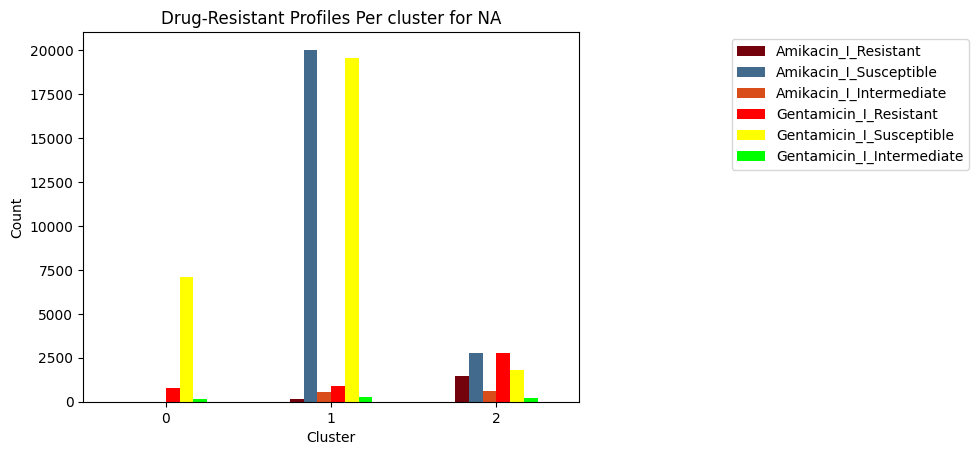

Cluster
0    1145
1    6536
2     286
dtype: int64


<Figure size 8000x5000 with 0 Axes>

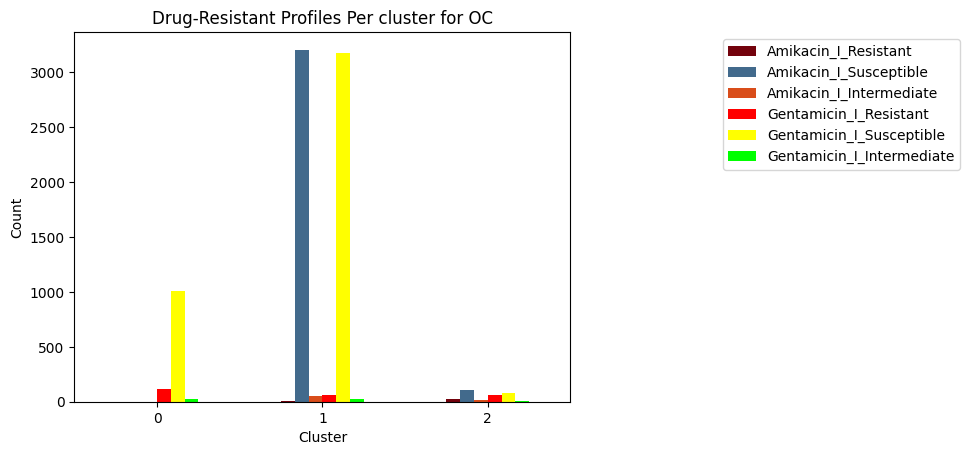

Cluster
0     3710
1    15286
2     7818
dtype: int64


<Figure size 8000x5000 with 0 Axes>

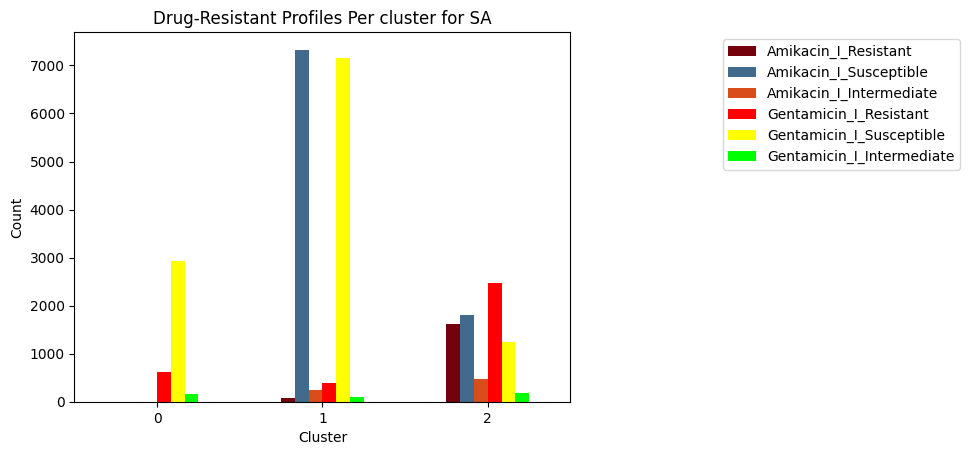

In [70]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Amikacin', 'Gentamicin']
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list, continent_data,continent)

In [ ]:
#

# Beta-lactam

Cluster
0      351
1    10482
2     6034
dtype: int64


<Figure size 8000x5000 with 0 Axes>

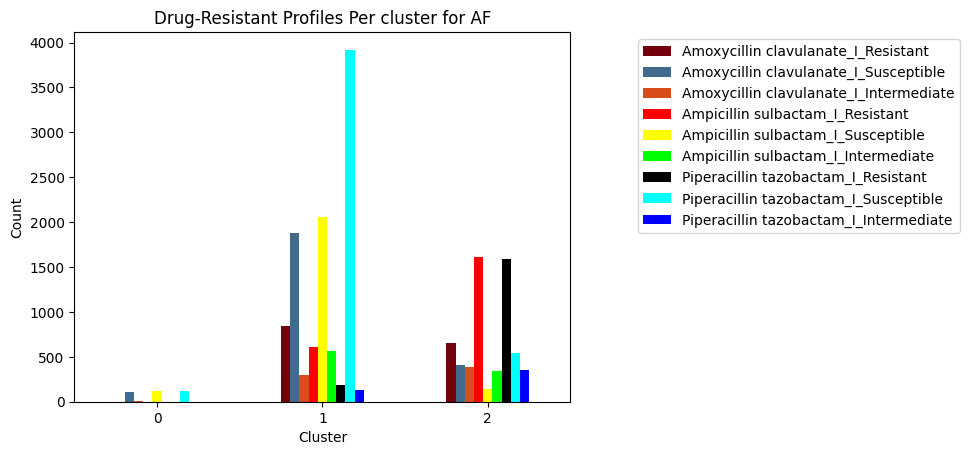

Cluster
0     2888
1    59598
2    29055
dtype: int64


<Figure size 8000x5000 with 0 Axes>

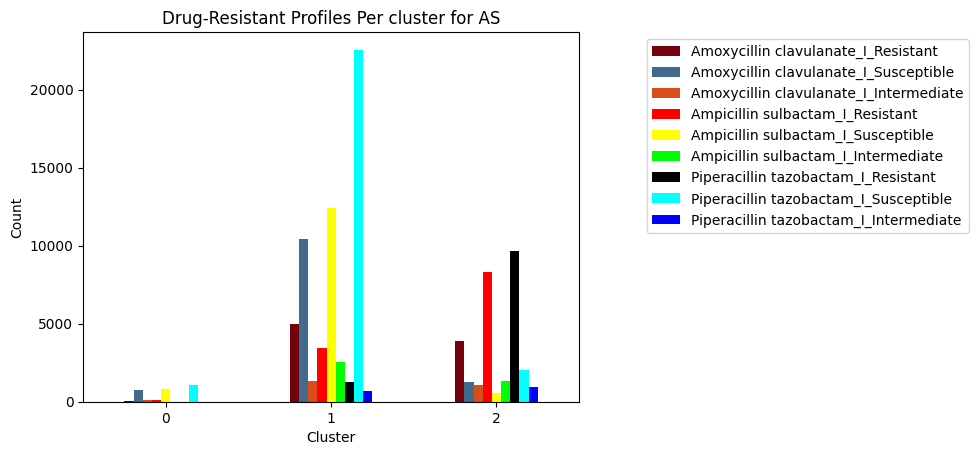

Cluster
0     10502
1    105073
2     26613
dtype: int64


<Figure size 8000x5000 with 0 Axes>

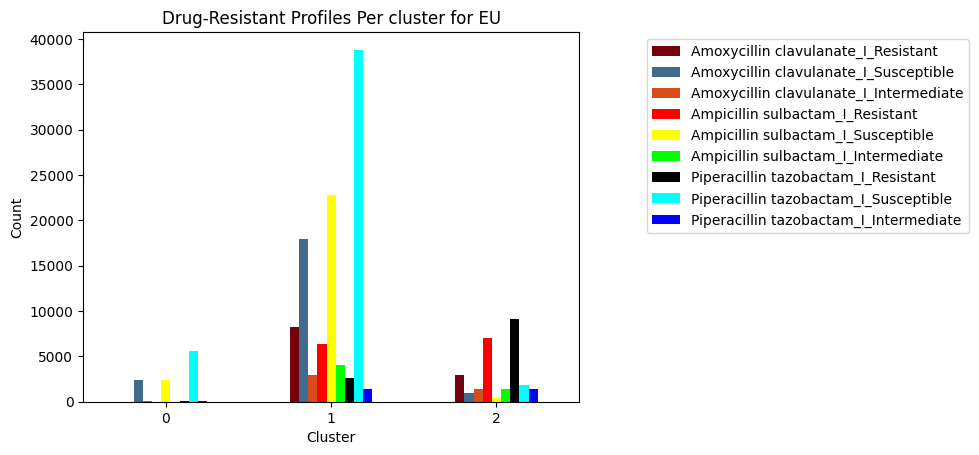

Cluster
0     3618
1    50875
2    10305
dtype: int64


<Figure size 8000x5000 with 0 Axes>

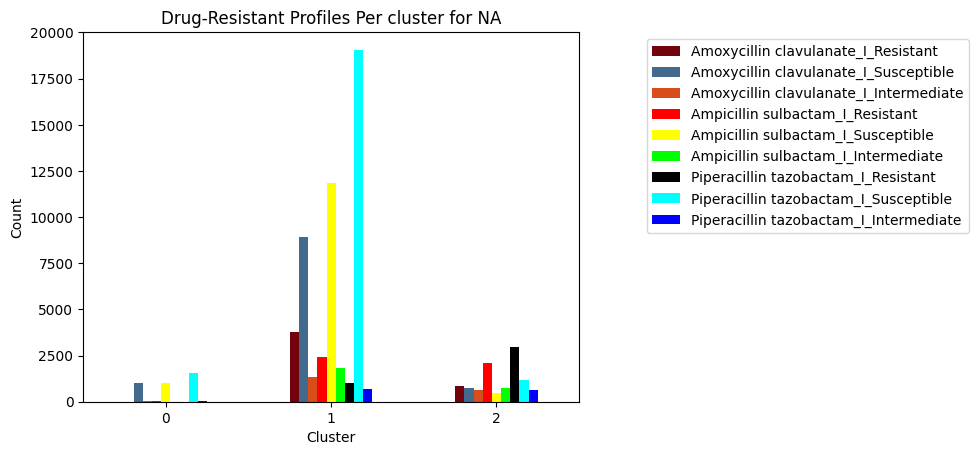

Cluster
0     552
1    7781
2     284
dtype: int64


<Figure size 8000x5000 with 0 Axes>

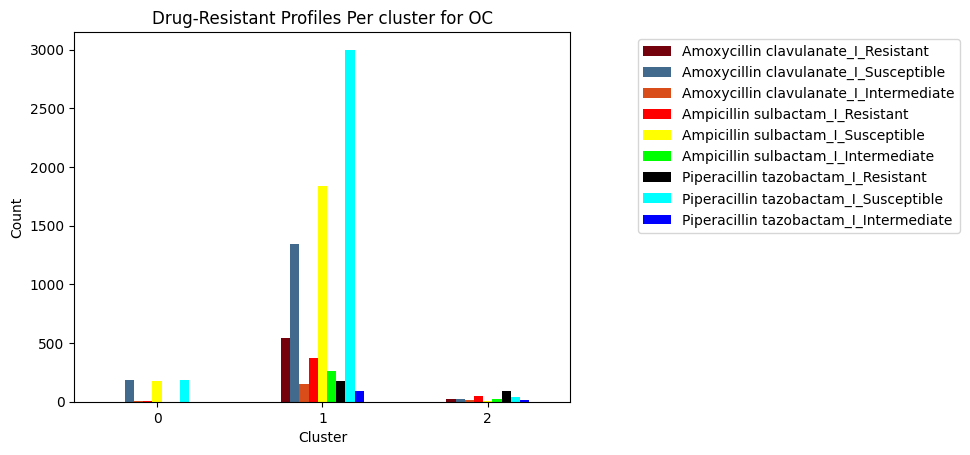

Cluster
0      588
1    18977
2     8924
dtype: int64


<Figure size 8000x5000 with 0 Axes>

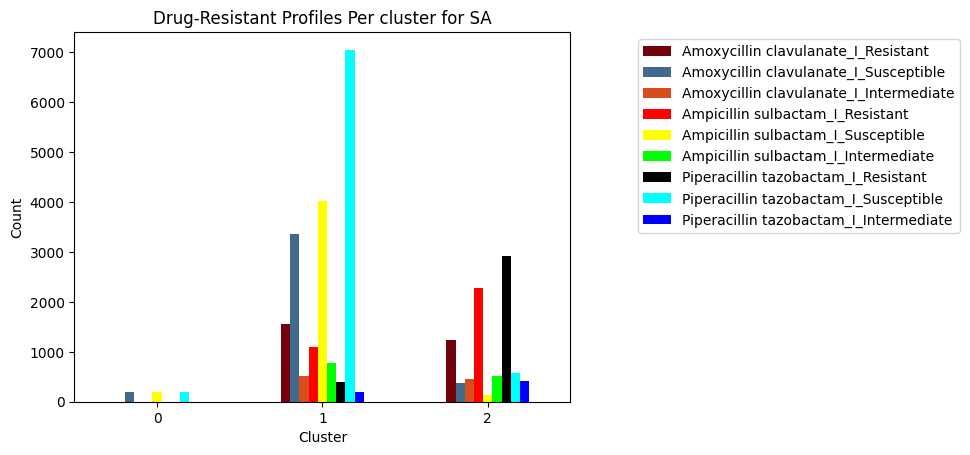

In [71]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_betalactams = ['Amoxycillin clavulanate', 'Ampicillin sulbactam','Piperacillin tazobactam']
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_betalactams, continent_data,continent)

  # Carbapenems': ['Imipenem', 'Meropenem'],


Cluster
0     578
1    8470
2    4965
dtype: int64


<Figure size 8000x5000 with 0 Axes>

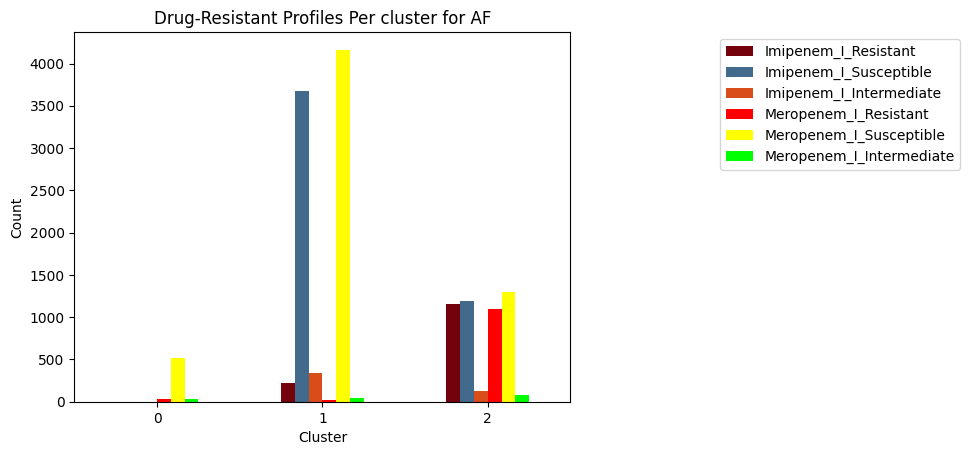

Cluster
0     4560
1    49008
2    25280
dtype: int64


<Figure size 8000x5000 with 0 Axes>

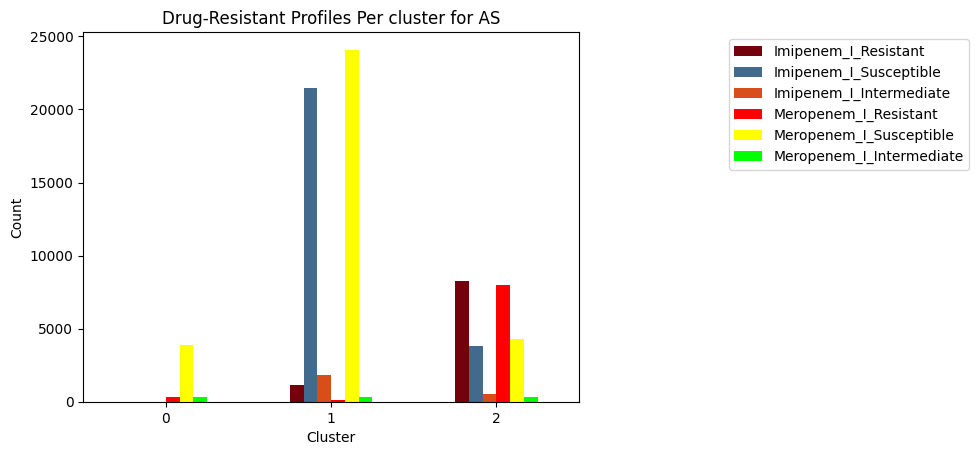

Cluster
0    13268
1    85542
2    24818
dtype: int64


<Figure size 8000x5000 with 0 Axes>

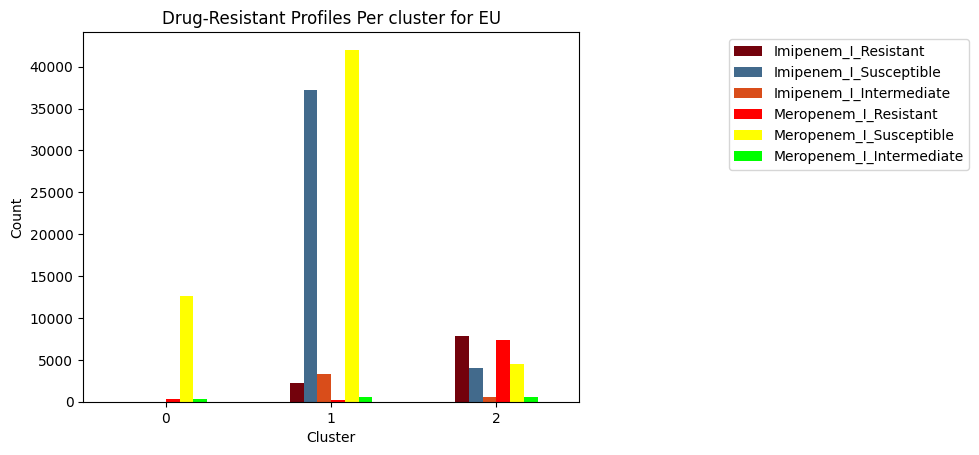

Cluster
0     4768
1    41482
2     9598
dtype: int64


<Figure size 8000x5000 with 0 Axes>

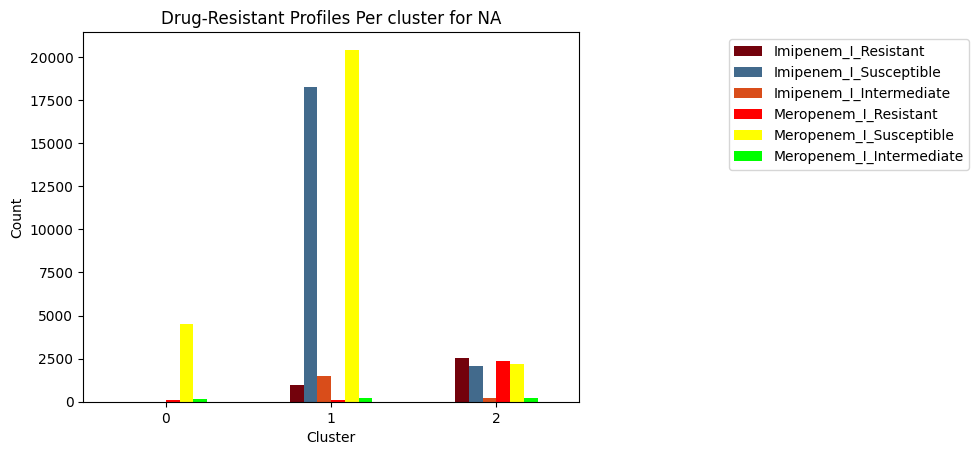

Cluster
0     776
1    6536
2     286
dtype: int64


<Figure size 8000x5000 with 0 Axes>

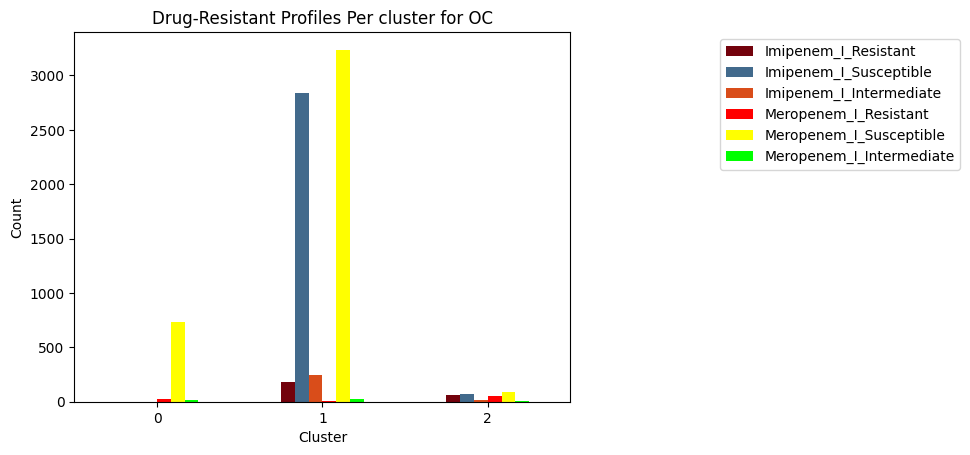

Cluster
0     1040
1    15291
2     7820
dtype: int64


<Figure size 8000x5000 with 0 Axes>

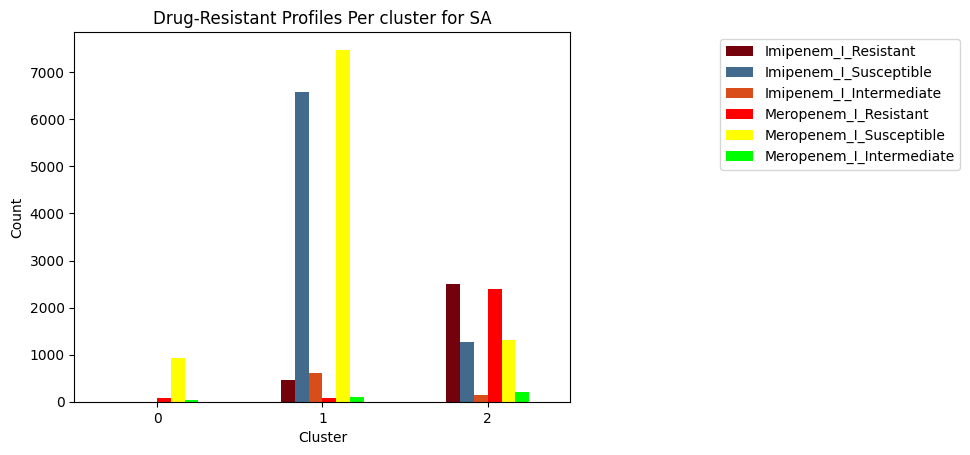

In [72]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_betalactams = ['Imipenem', 'Meropenem']
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_betalactams, continent_data,continent)

In [ ]:
# Content vs resistance to  Fluoroquinolones

# Content vs resistance to  Fluoroquinolones

Cluster
0    3211
1    8470
2    4973
dtype: int64


<Figure size 8000x5000 with 0 Axes>

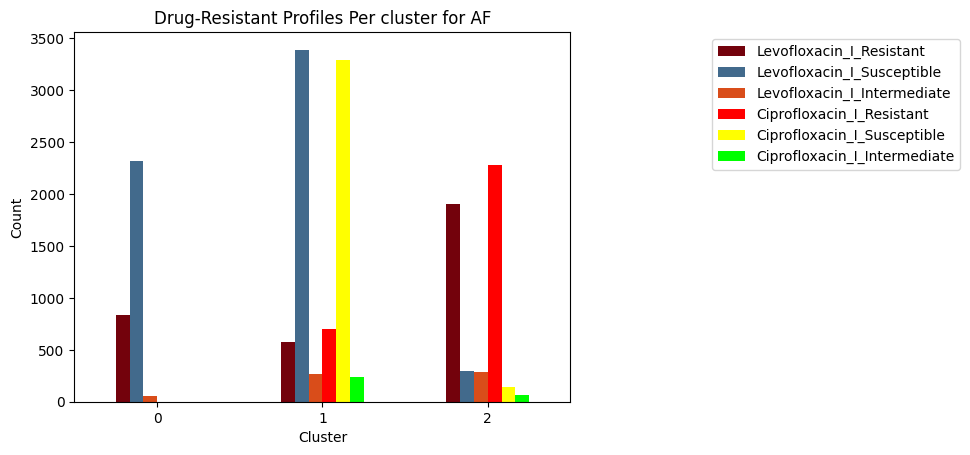

Cluster
0    18377
1    49006
2    25307
dtype: int64


<Figure size 8000x5000 with 0 Axes>

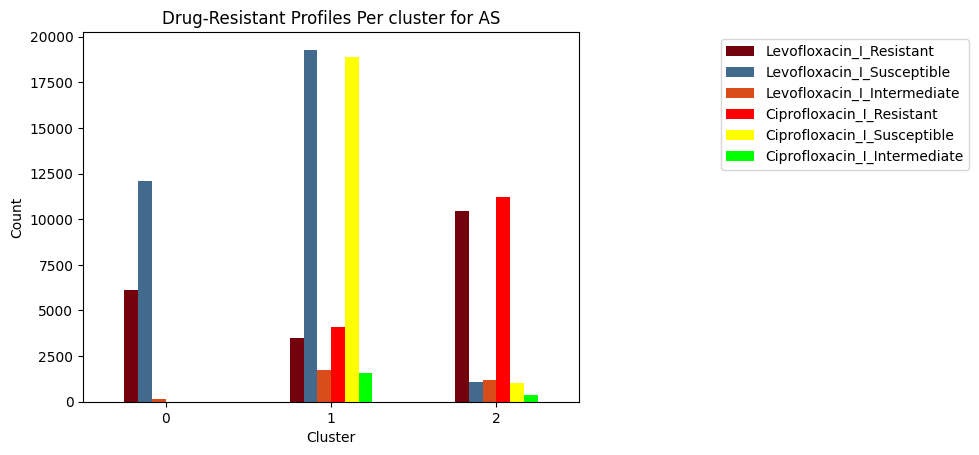

Cluster
0    33979
1    85545
2    24824
dtype: int64


<Figure size 8000x5000 with 0 Axes>

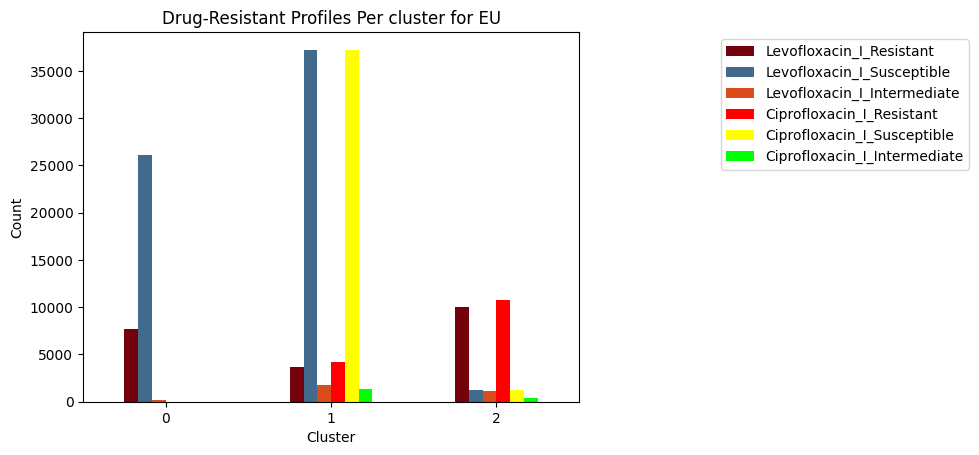

Cluster
0    14989
1    41482
2     9607
dtype: int64


<Figure size 8000x5000 with 0 Axes>

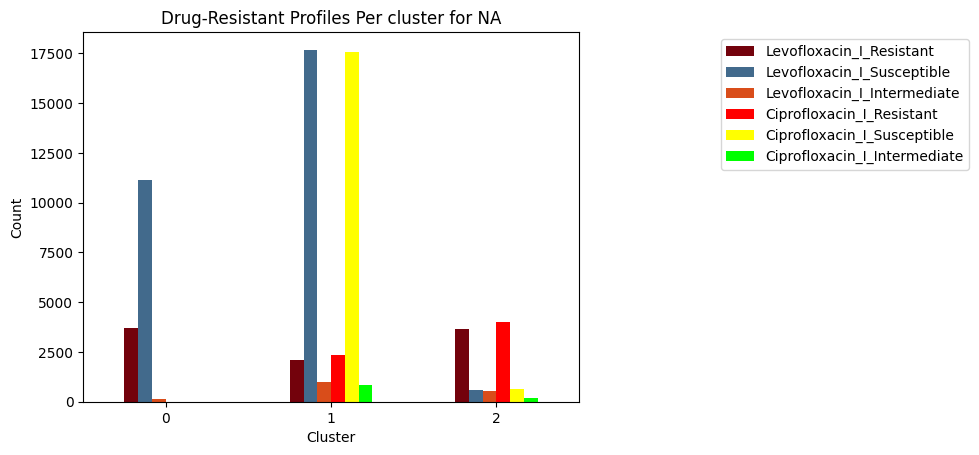

Cluster
0    2330
1    6536
2     286
dtype: int64


<Figure size 8000x5000 with 0 Axes>

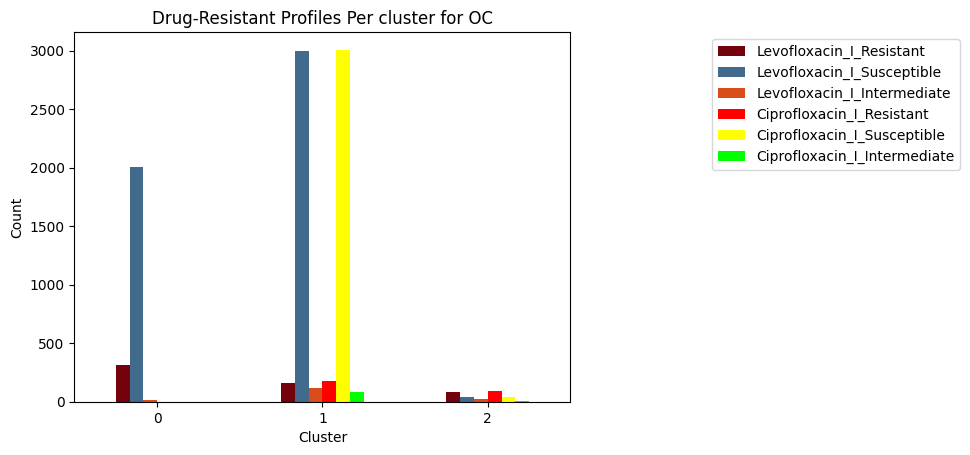

Cluster
0     5950
1    15293
2     7828
dtype: int64


<Figure size 8000x5000 with 0 Axes>

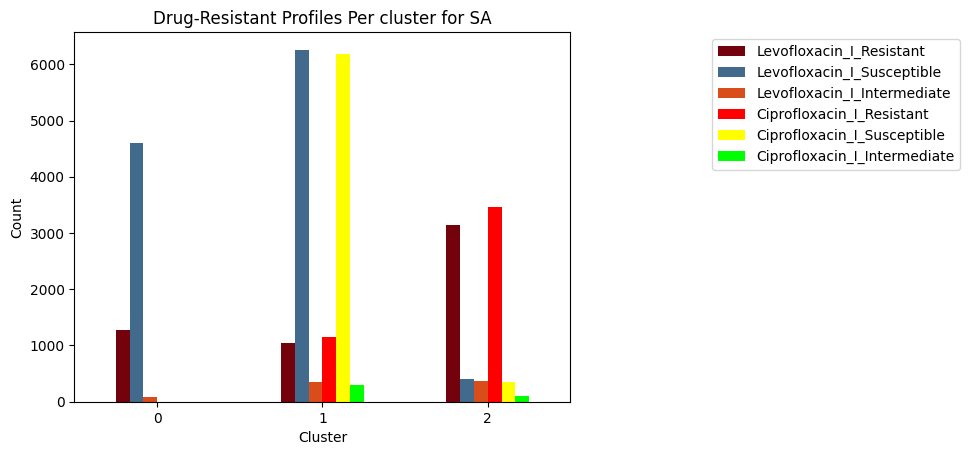

In [73]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Levofloxacin', 'Ciprofloxacin']
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list, continent_data,continent)

  # Others
  

Cluster
0    3211
1    7036
2    3289
dtype: int64


<Figure size 8000x5000 with 0 Axes>

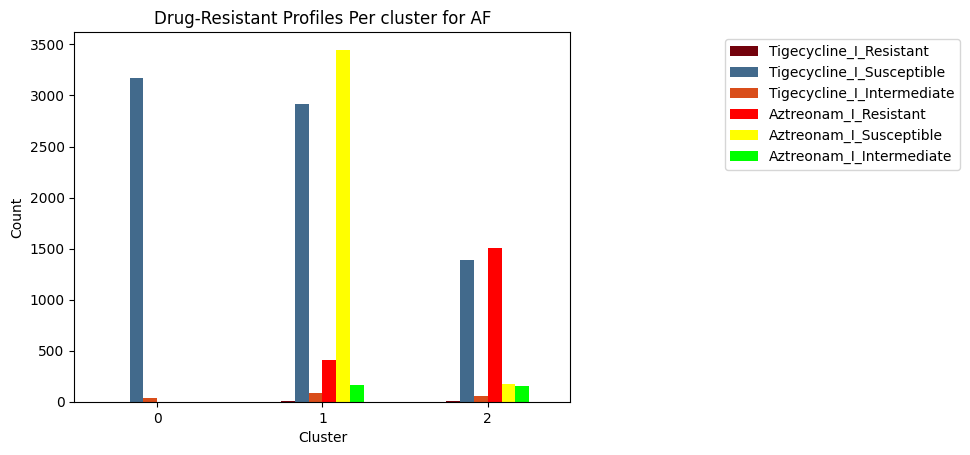

Cluster
0    18588
1    39564
2    14871
dtype: int64


<Figure size 8000x5000 with 0 Axes>

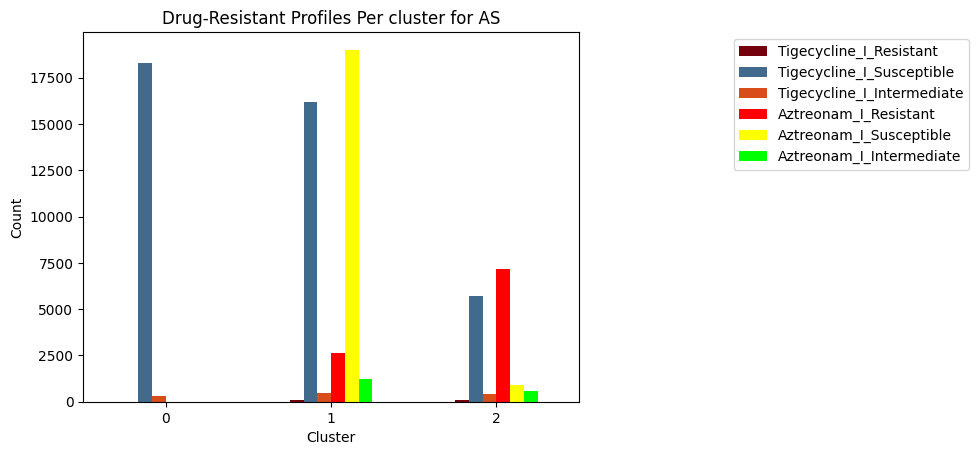

Cluster
0    37190
1    67964
2    14237
dtype: int64


<Figure size 8000x5000 with 0 Axes>

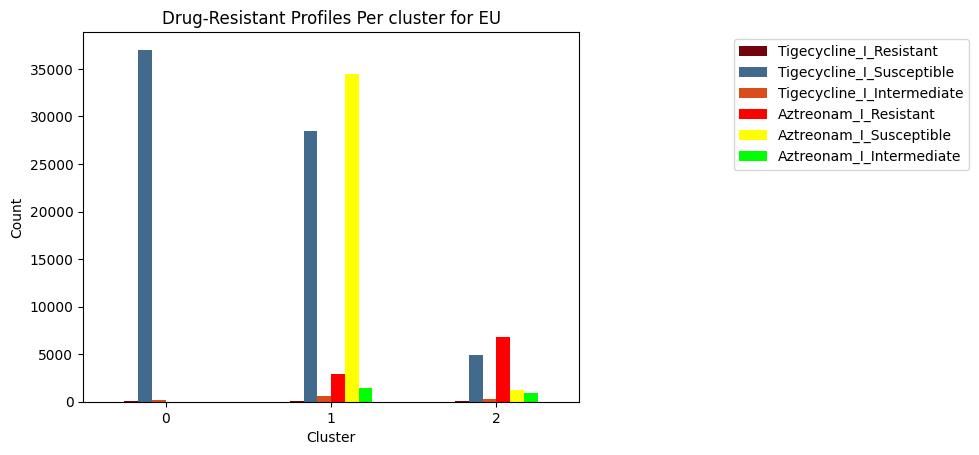

Cluster
0    15508
1    32579
2     5854
dtype: int64


<Figure size 8000x5000 with 0 Axes>

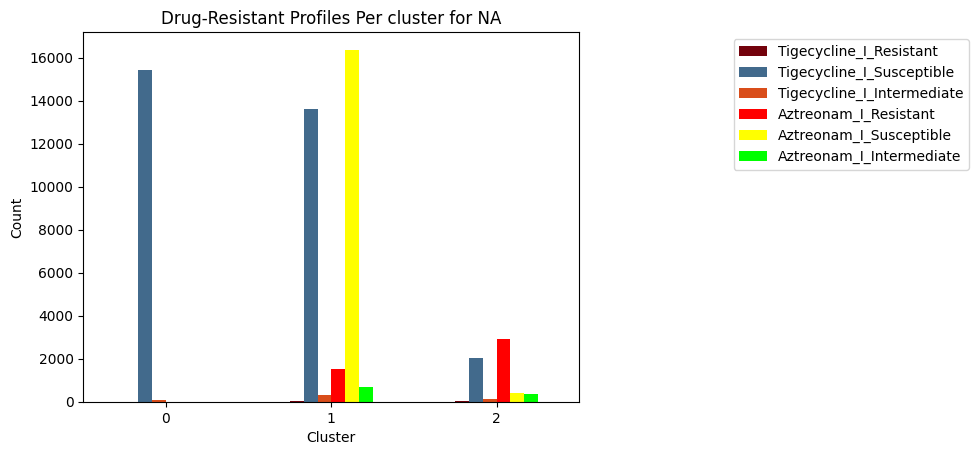

Cluster
0    2330
1    4884
2     194
dtype: int64


<Figure size 8000x5000 with 0 Axes>

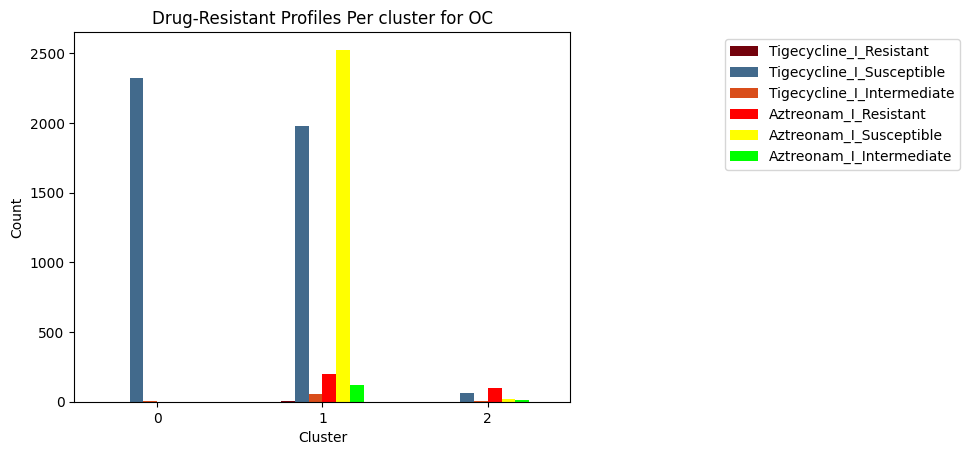

Cluster
0     5950
1    12602
2     5131
dtype: int64


<Figure size 8000x5000 with 0 Axes>

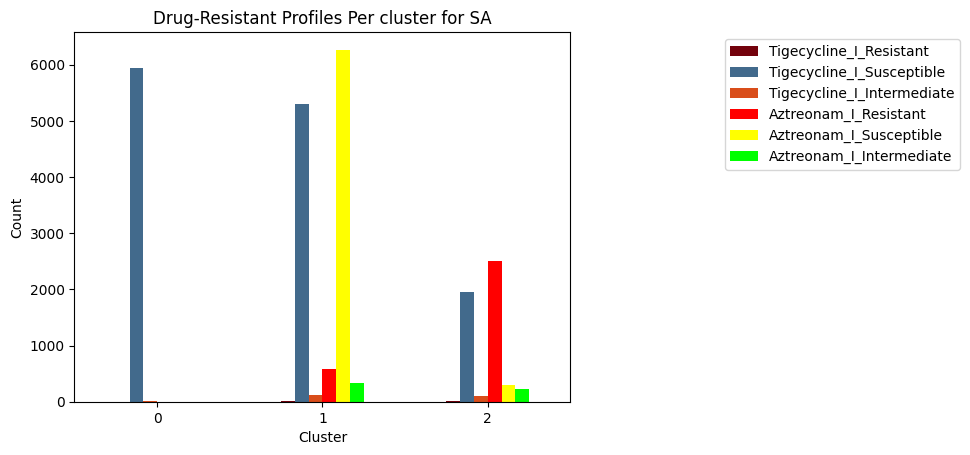

In [74]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list_others = ['Tigecycline',"Aztreonam"]
# Drug Visualization from each continent
for continent, continent_data in df.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list_others, continent_data,continent)

In [ ]:
# # Correlation Analysis
# import random
# import matplotlib.pyplot as plt
# import seaborn as sns
# def Correlation_matrix_per_Continent(data_with_clusters):
#   # List of drugs with resistance, susceptible, and intermediate profiles
#   drugs_list = ['Amikacin', 'Amoxycillin clavulanate', 'Ampicillin', 'Azithromycin', 'Cefepime', 'Cefoxitin', 'Ceftazidime', 'Ceftriaxone', 'Clindamycin', 'Erythromycin', 'Imipenem', 'Levofloxacin', 'Linezolid', 'Meropenem', 'Metronidazole', 'Penicillin', 'Piperacillin tazobactam', 'Tigecycline', 'Vancomycin', 'Ampicillin sulbactam', 'Aztreonam', 'Ceftaroline', 'Ceftazidime avibactam', 'Ciprofloxacin', 'Colistin', 'Daptomycin', 'Gentamicin', 'Oxacillin', 'Teicoplanin', 'Trimethoprim sulfa', 'Meropenem vaborbactam']

#   # Create a list to store the selected drug resistance columns
#   selected_columns = []

#   # Iterate over the drugs list and check if each drug has the three combinations of resistance, susceptibility, and intermediate
#   for drug in drugs_list:
#       resistance_column = drug + '_I_Resistant'
#       susceptible_column = drug + '_I_Susceptible'
#       intermediate_column = drug + '_I_Intermediate'

#       # Check if all three columns exist in the dataset
#       if all(column in data_with_clusters.columns for column in [resistance_column, susceptible_column, intermediate_column]):
#           selected_columns.extend([resistance_column, susceptible_column, intermediate_column])
#       else:
#           print(f"Skipping {drug} as one or more columns are missing.")

#   # Select the relevant drug resistance columns for analysis
#   drug_resistance_columns = selected_columns

#   # Create a new DataFrame with the selected columns and cluster labels
#   resistance_data = data_with_clusters[['Cluster'] + drug_resistance_columns]

#   # Group the data by the cluster labels
#   grouped_data = resistance_data.groupby('Cluster')

#   # Iterate over each cluster and create a correlation matrix heatmap
#   for cluster, cluster_data in grouped_data:
#       # Calculate the sum of resistance, susceptibility, and intermediate statuses for each drug in the current cluster
#       drug_resistance_counts = cluster_data.drop('Cluster', axis=1).sum()

#       # Calculate the correlation matrix
#       correlation_matrix = cluster_data.drop('Cluster', axis=1).corr()

#       # Plot the correlation matrix heatmap
#       plt.figure(figsize=(20, 15))
#       sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5, annot_kws={"fontsize": 7})

#       plt.title(f'Drug-Resistant Profiles for Cluster {cluster}')
#       plt.xlabel('Drug')
#       plt.ylabel('Drug')
#       plt.xticks(rotation=90, fontsize=7)
#       plt.yticks(rotation=0, fontsize=7)
#       plt.tight_layout()
#       plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


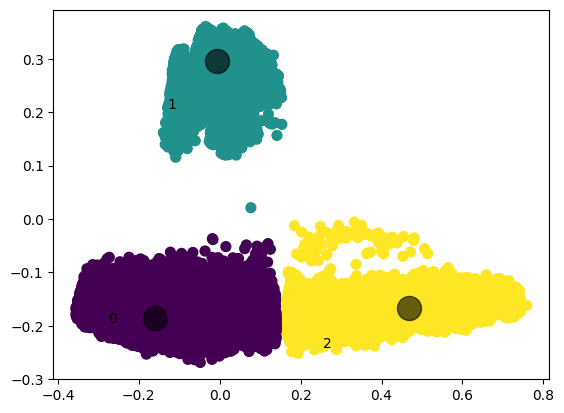

In [85]:
# Age-Dtug resistance  clustering analysis
df_age, clusters_age=KNN_clustering(important_data_age,"Age Group")
# df_age

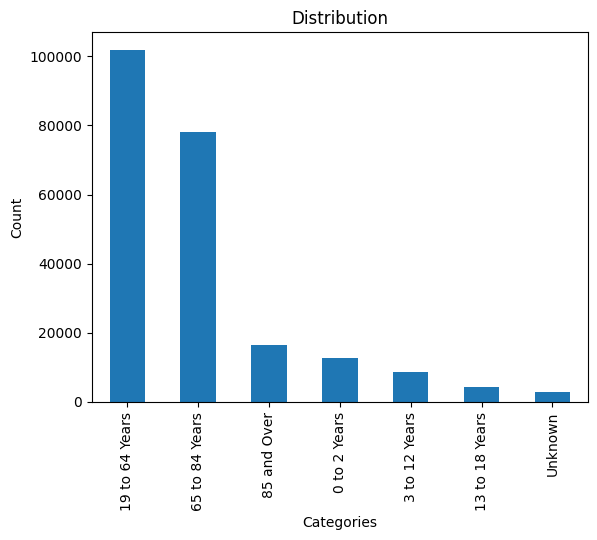

In [86]:
# Distribution
# Calculate the distribution of continent_data
distribution = important_data_age['Age Group'].value_counts()
# Plot the distribution
plt.figure()
distribution.plot(kind='bar')
plt.title(f"Distribution")
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

# Drug resistance patterns by Age


Cluster
0    10528
1     2694
2     3108
dtype: int64


<Figure size 8000x5000 with 0 Axes>

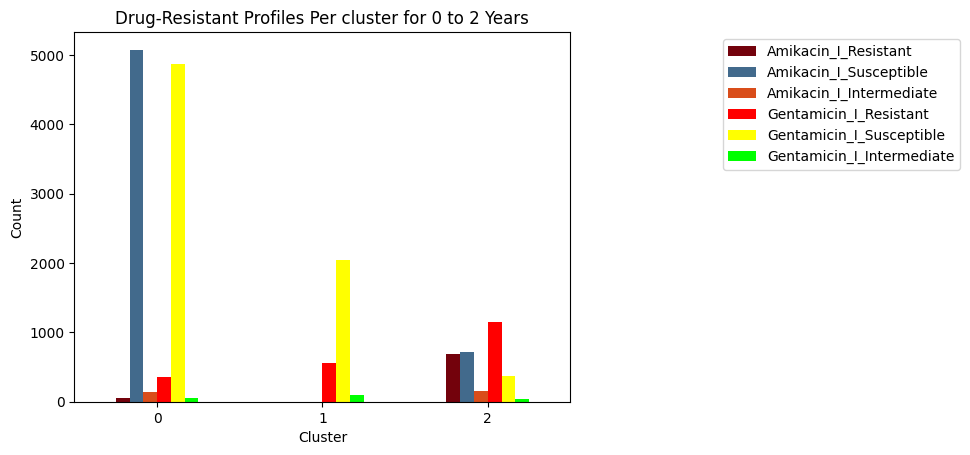

Cluster
0    3574
1    1215
2    1090
dtype: int64


<Figure size 8000x5000 with 0 Axes>

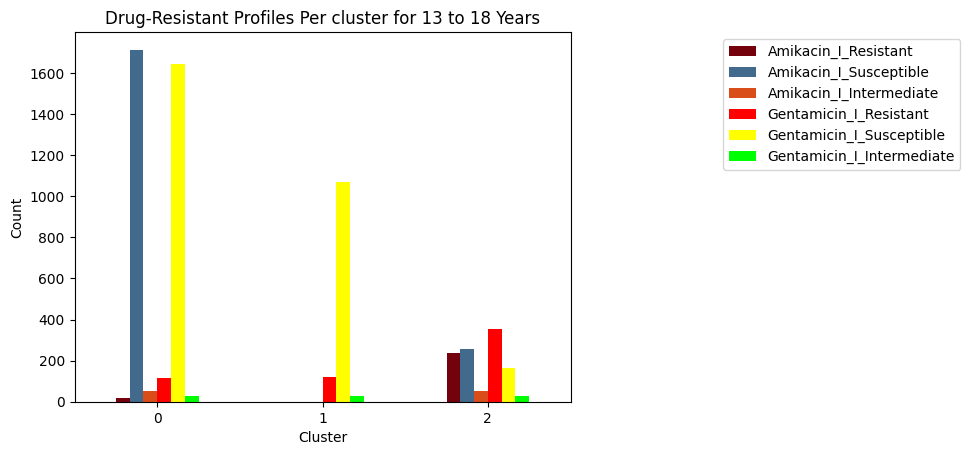

Cluster
0    88477
1    21296
2    35274
dtype: int64


<Figure size 8000x5000 with 0 Axes>

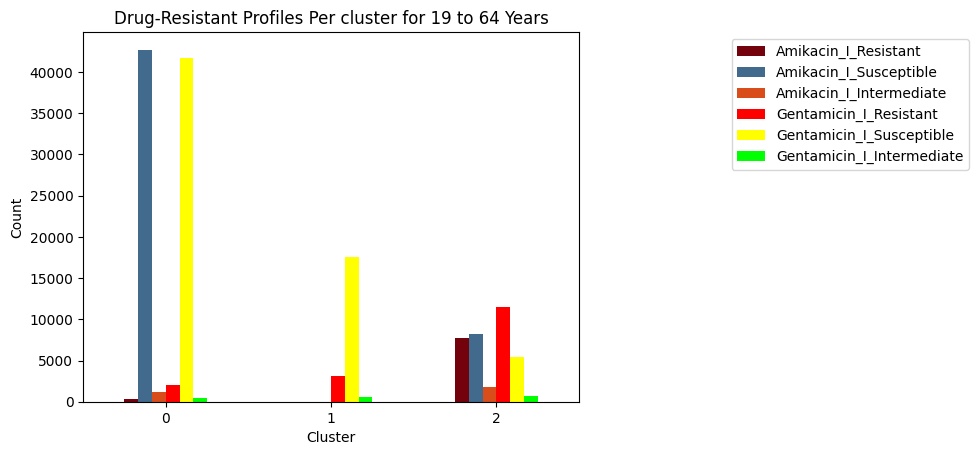

Cluster
0    6552
1    2074
2    1706
dtype: int64


<Figure size 8000x5000 with 0 Axes>

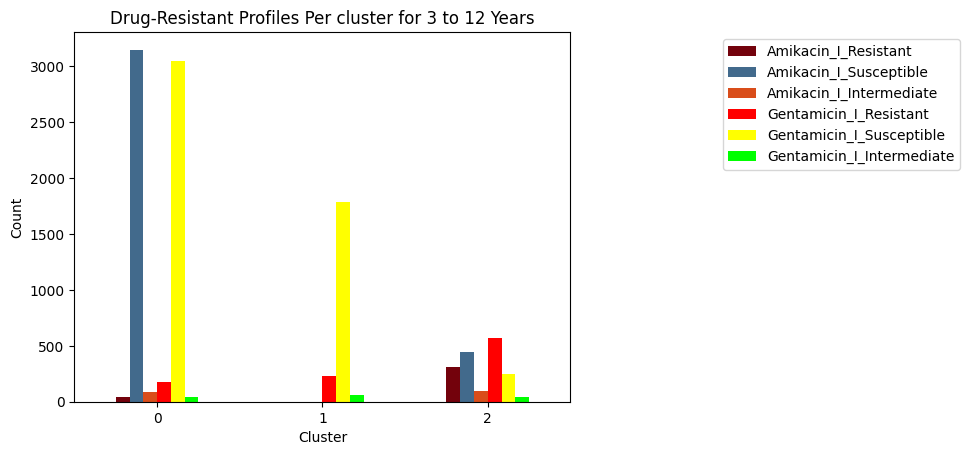

Cluster
0    77298
1    12943
2    26110
dtype: int64


<Figure size 8000x5000 with 0 Axes>

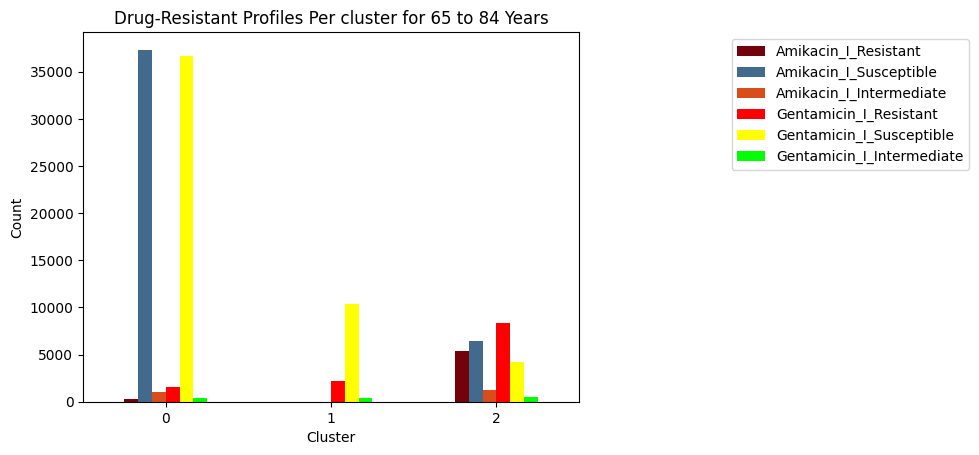

Cluster
0    17414
1     2621
2     4444
dtype: int64


<Figure size 8000x5000 with 0 Axes>

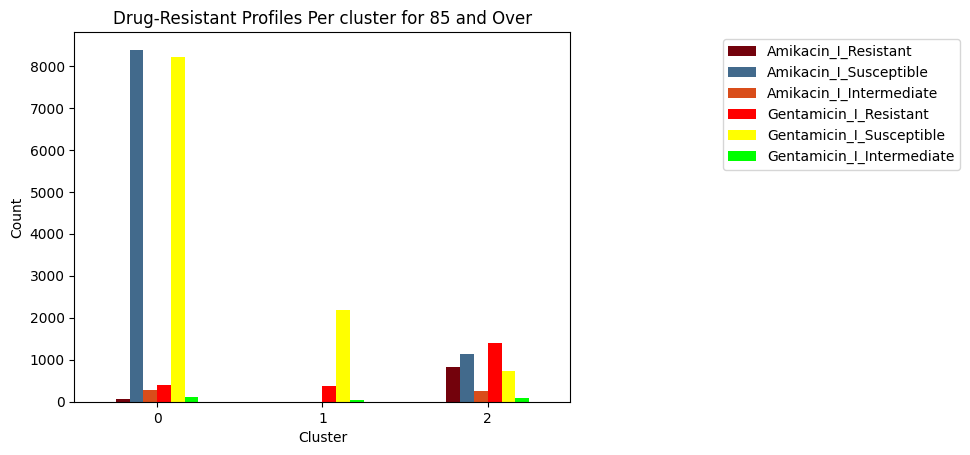

Cluster
0    2512
1     549
2     998
dtype: int64


<Figure size 8000x5000 with 0 Axes>

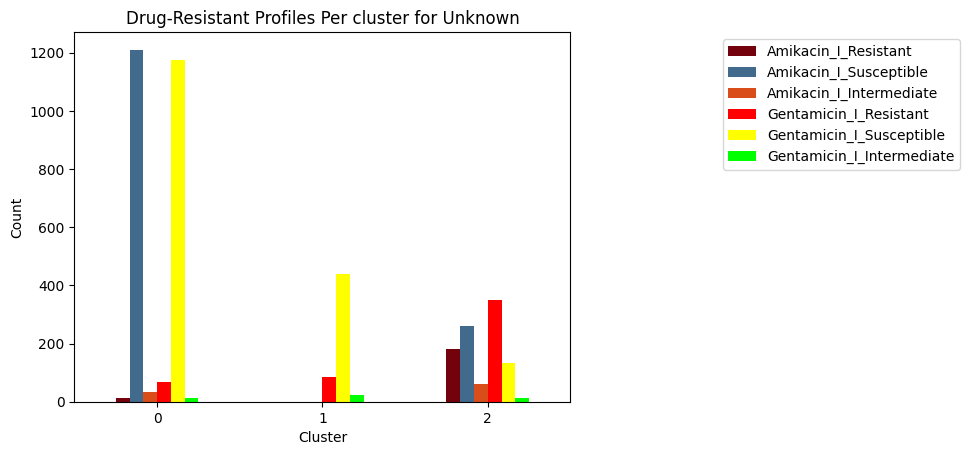

In [87]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Amikacin', 'Gentamicin']
# Drug Visualization from each continent
for age, continent_data in df_age.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list, continent_data,age)

# Age and beta lactam resistance profiles

Cluster
0    13252
1     1576
2     3749
dtype: int64


<Figure size 8000x5000 with 0 Axes>

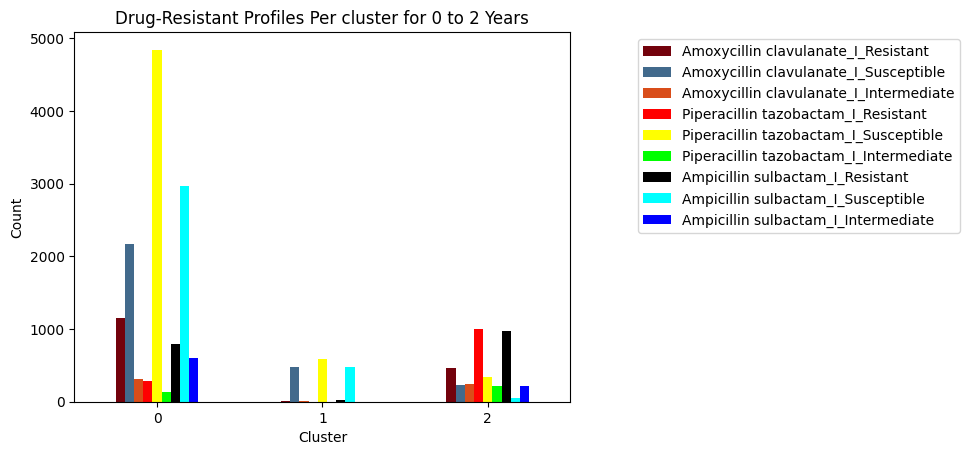

Cluster
0    4177
1     350
2    1175
dtype: int64


<Figure size 8000x5000 with 0 Axes>

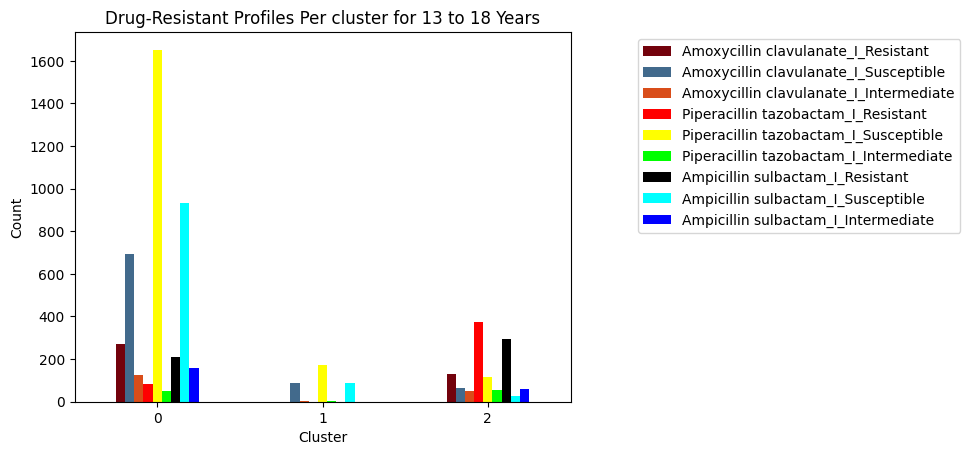

Cluster
0    108338
1      7928
2     39008
dtype: int64


<Figure size 8000x5000 with 0 Axes>

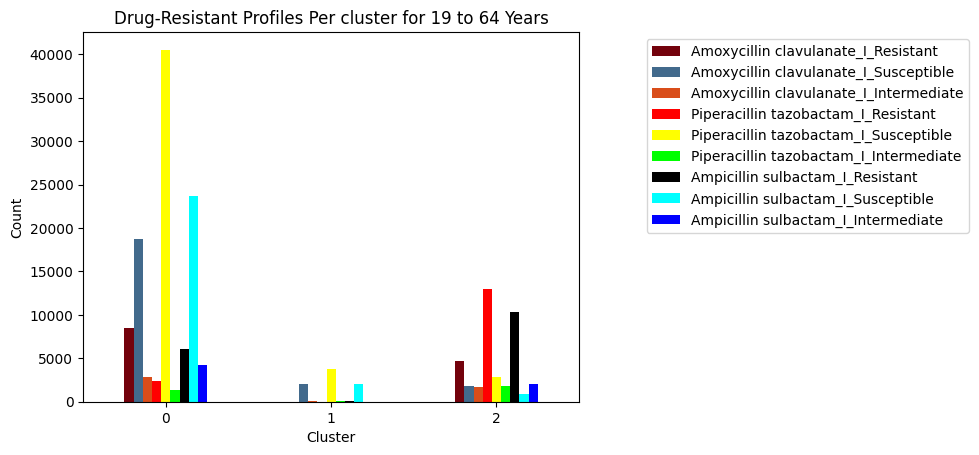

Cluster
0    7500
1    1295
2    1895
dtype: int64


<Figure size 8000x5000 with 0 Axes>

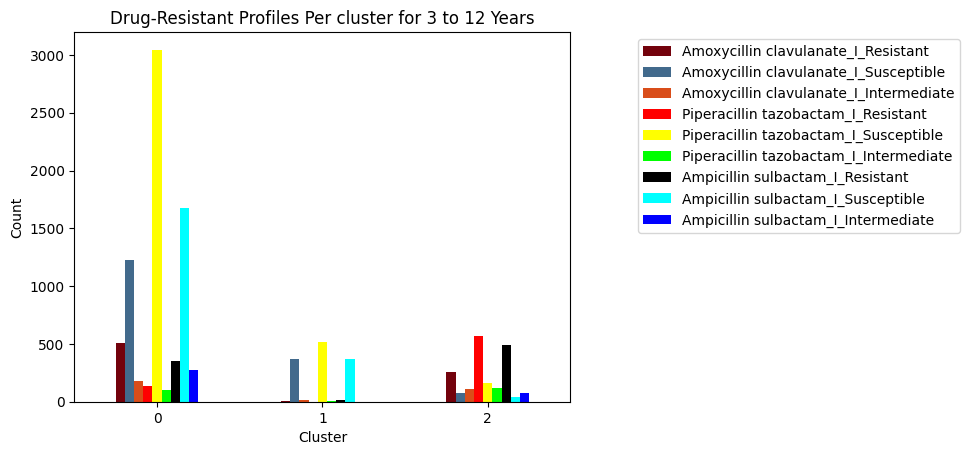

Cluster
0    94875
1     6016
2    29255
dtype: int64


<Figure size 8000x5000 with 0 Axes>

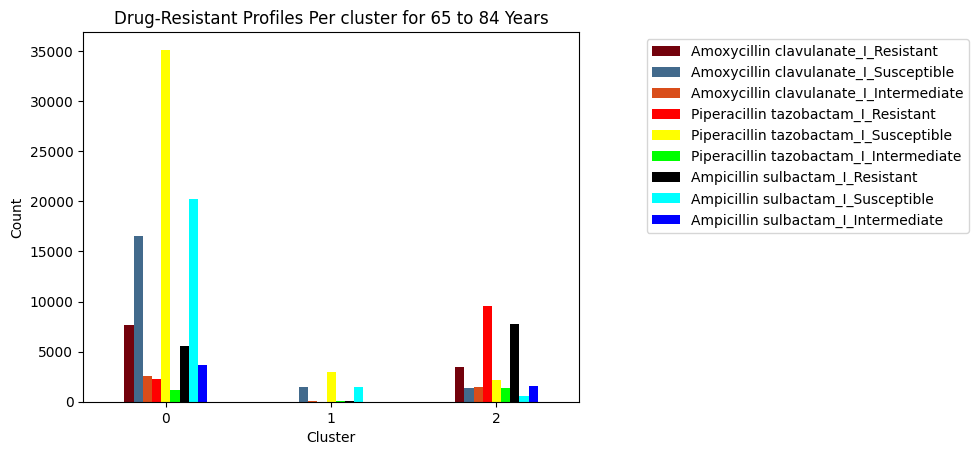

Cluster
0    21574
1     1138
2     4974
dtype: int64


<Figure size 8000x5000 with 0 Axes>

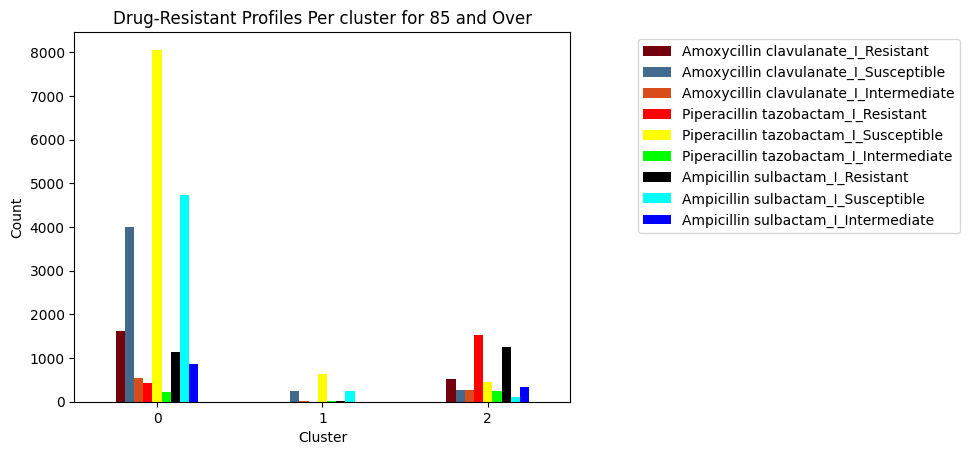

Cluster
0    3106
1     196
2    1123
dtype: int64


<Figure size 8000x5000 with 0 Axes>

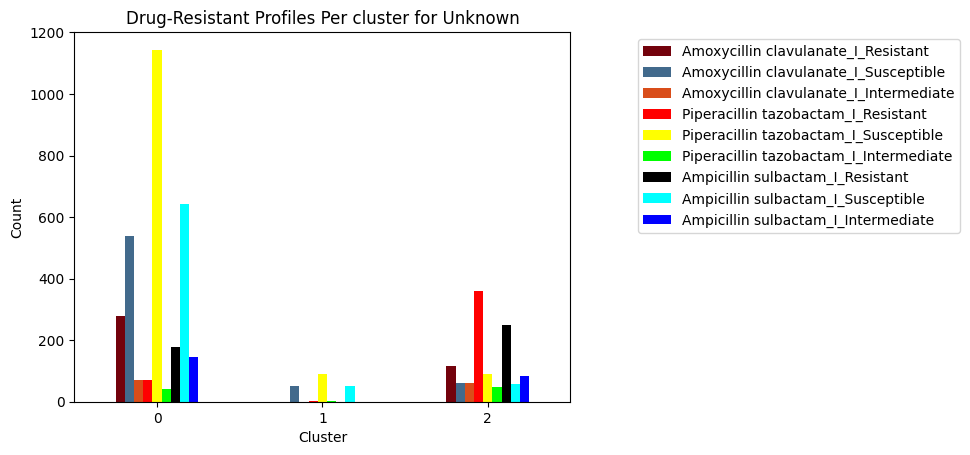

In [88]:
# Beta-lactam
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_betalactams = ['Amoxycillin clavulanate', 'Piperacillin tazobactam', 'Ampicillin sulbactam']
# Drug Visualization from each continent
for continent, continent_data in df_age.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_betalactams, continent_data,continent)

# Age vs Fluoro

Cluster
0    10529
1     5195
2     3110
dtype: int64


<Figure size 8000x5000 with 0 Axes>

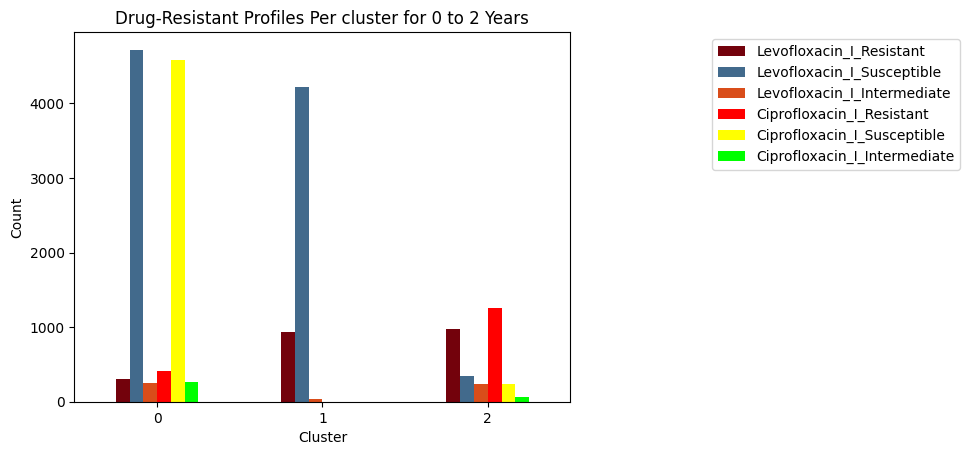

Cluster
0    3574
1    1850
2    1092
dtype: int64


<Figure size 8000x5000 with 0 Axes>

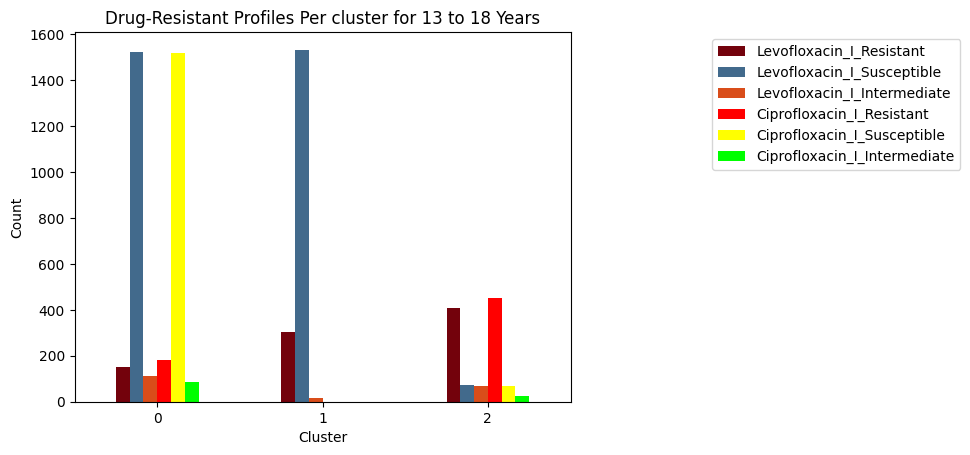

Cluster
0    88479
1    37569
2    35302
dtype: int64


<Figure size 8000x5000 with 0 Axes>

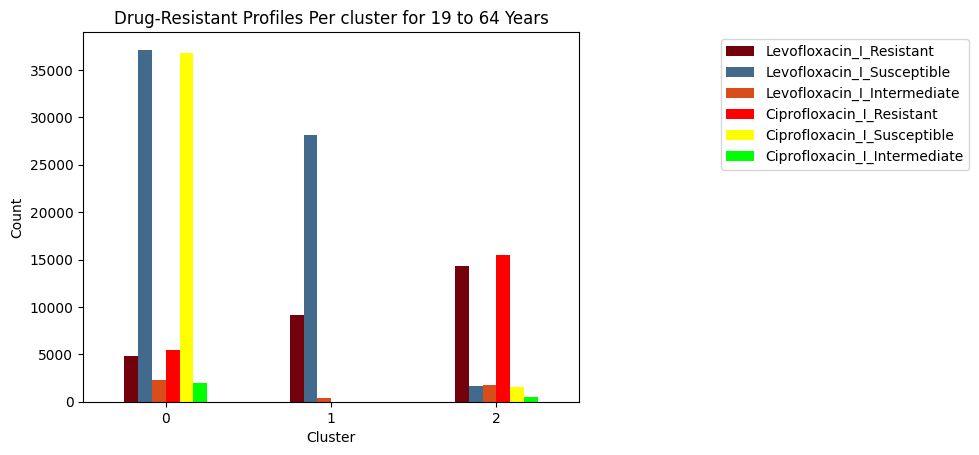

Cluster
0    6552
1    4151
2    1707
dtype: int64


<Figure size 8000x5000 with 0 Axes>

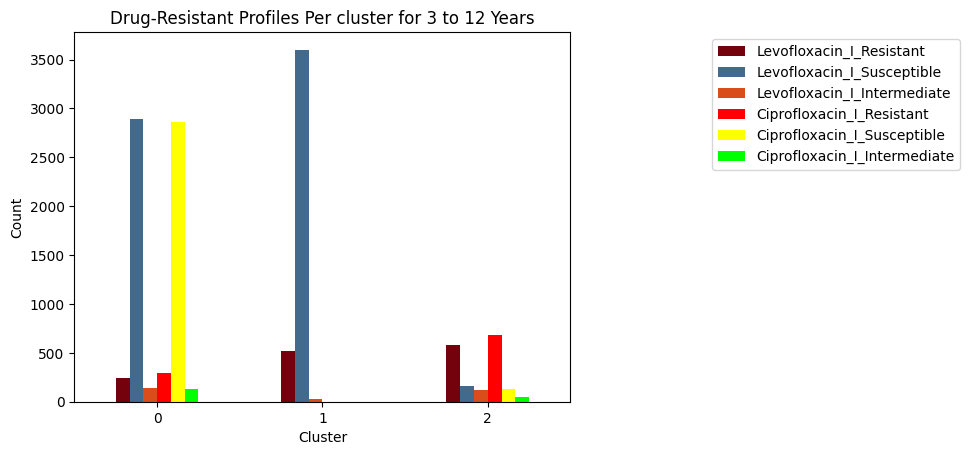

Cluster
0    77304
1    24232
2    26130
dtype: int64


<Figure size 8000x5000 with 0 Axes>

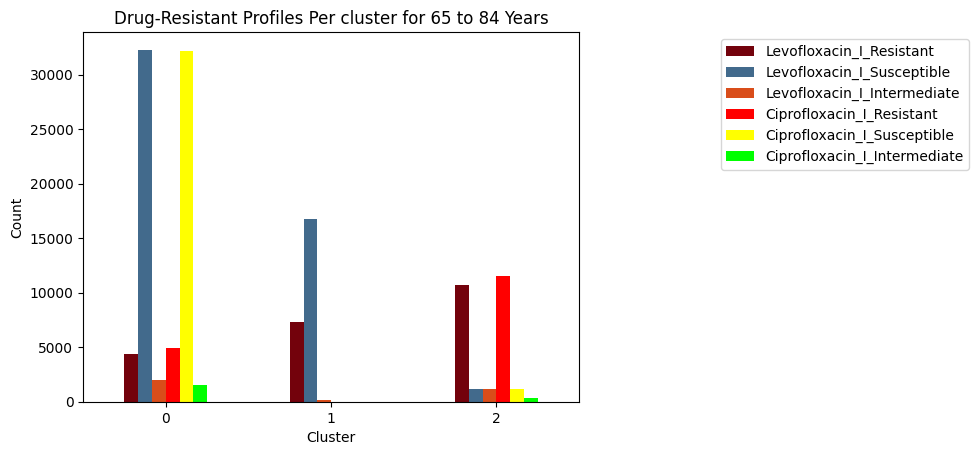

Cluster
0    17414
1     4887
2     4453
dtype: int64


<Figure size 8000x5000 with 0 Axes>

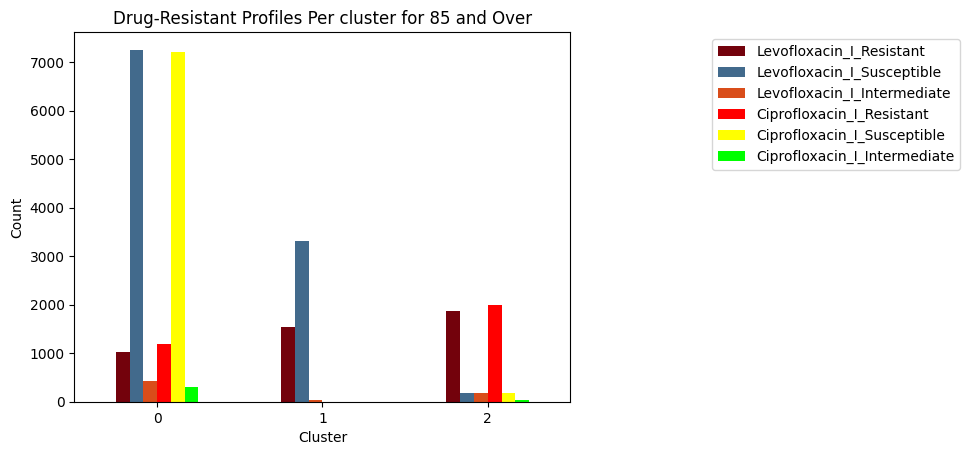

Cluster
0    2512
1     952
2     999
dtype: int64


<Figure size 8000x5000 with 0 Axes>

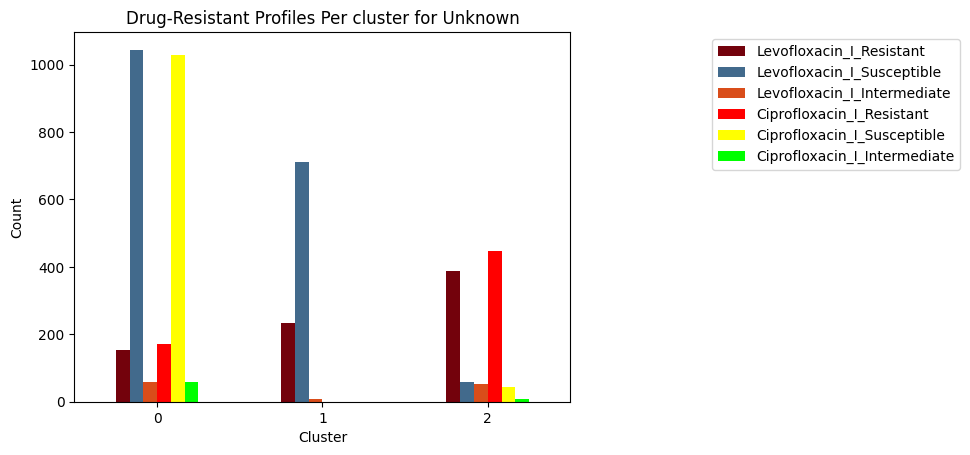

In [89]:
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Levofloxacin', 'Ciprofloxacin']
# Drug Visualization from each continent
for continent, continent_data in df_age.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list, continent_data,continent)

Cluster
0    8163
1    5284
2    2188
dtype: int64


<Figure size 8000x5000 with 0 Axes>

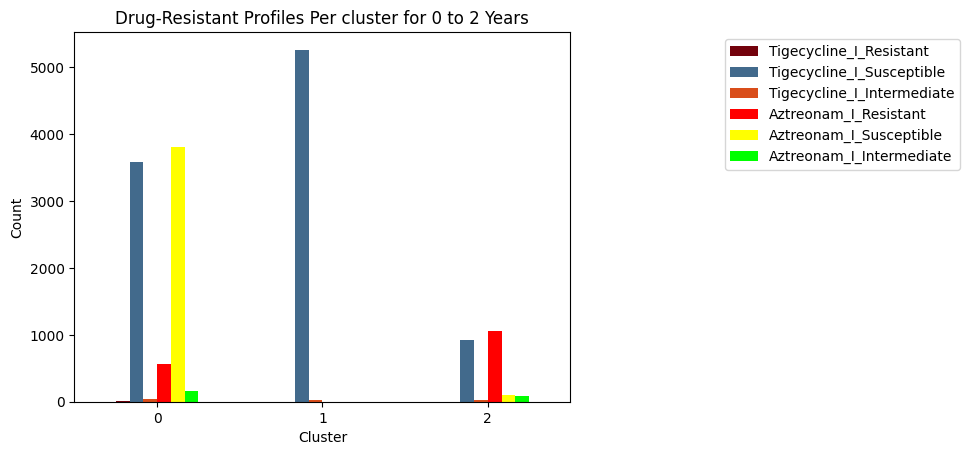

Cluster
0    2667
1    1936
2     653
dtype: int64


<Figure size 8000x5000 with 0 Axes>

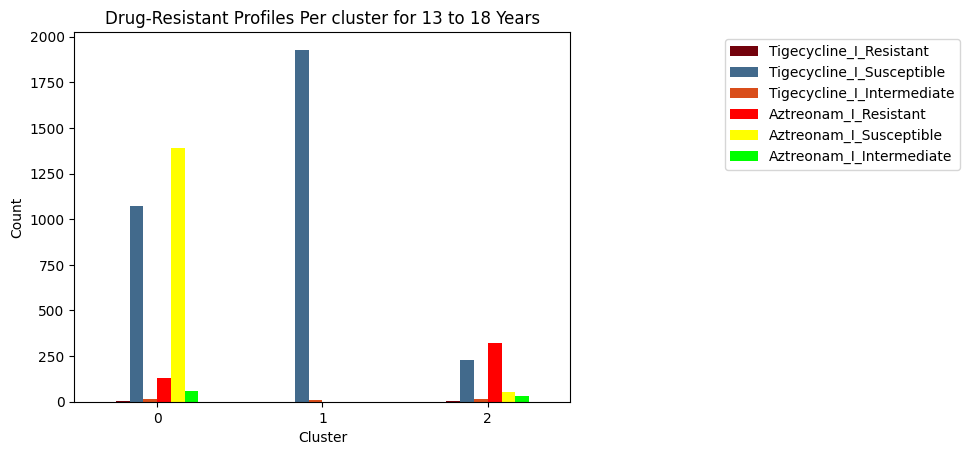

Cluster
0    70134
1    39261
2    20668
dtype: int64


<Figure size 8000x5000 with 0 Axes>

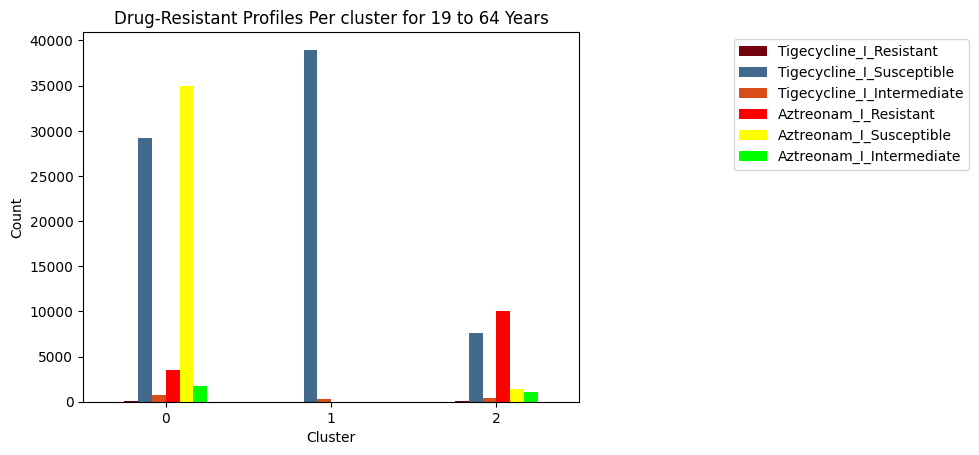

Cluster
0    4794
1    4281
2    1116
dtype: int64


<Figure size 8000x5000 with 0 Axes>

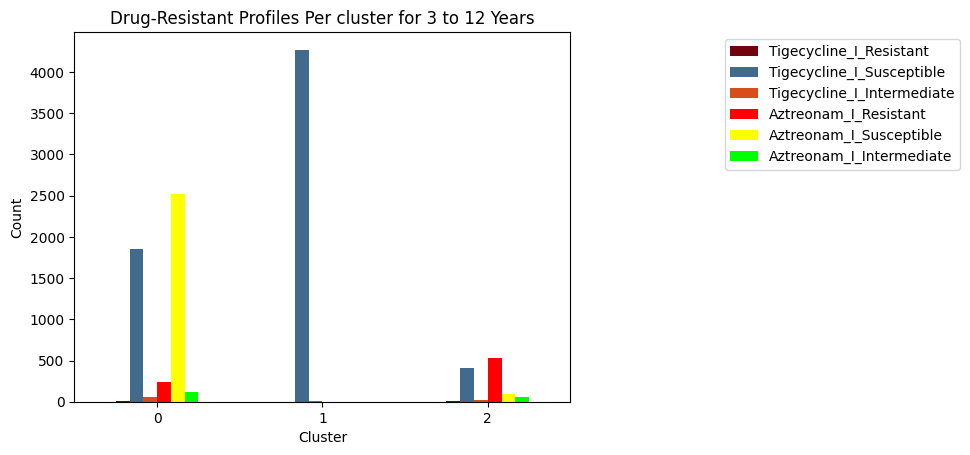

Cluster
0    62543
1    25730
2    15704
dtype: int64


<Figure size 8000x5000 with 0 Axes>

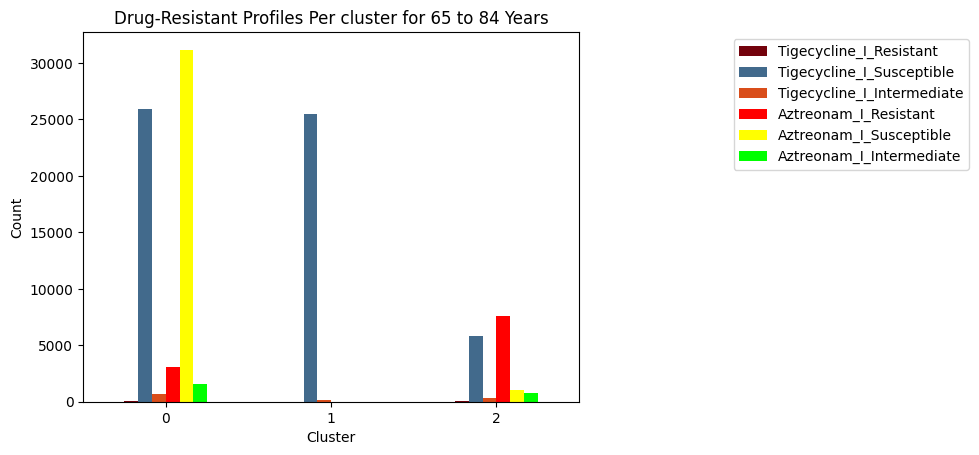

Cluster
0    14293
1     5293
2     2632
dtype: int64


<Figure size 8000x5000 with 0 Axes>

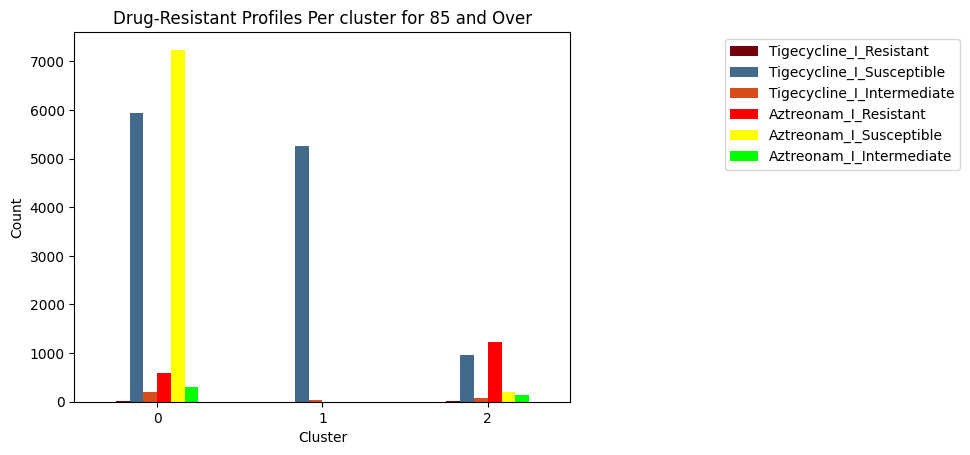

Cluster
0    2064
1     992
2     586
dtype: int64


<Figure size 8000x5000 with 0 Axes>

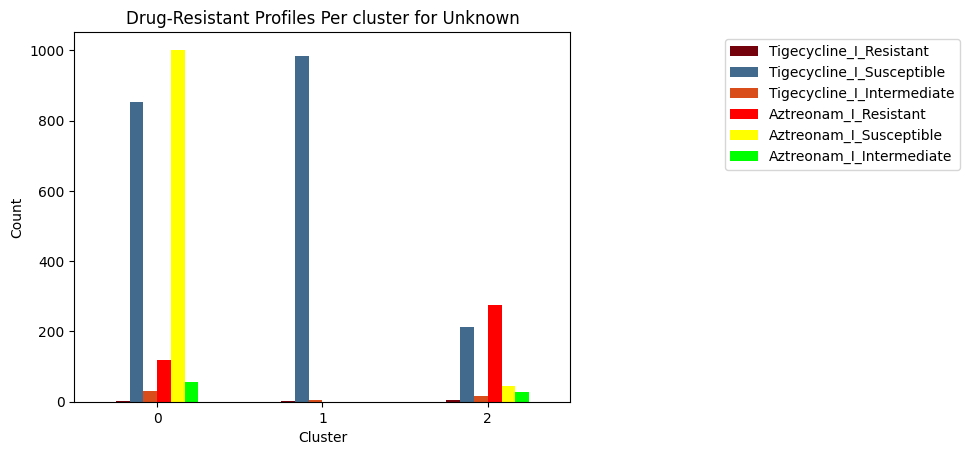

In [90]:
# Others
# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list_others = ['Tigecycline',"Aztreonam"]
# Drug Visualization from each continent
for continent, continent_data in df_age.items():
  # print(f"Continent: {continent}")
  # print(continent_data.shape)
  Resistance_Visualization(drugs_list_others, continent_data,continent)

In [ ]:
# Correlation matrix of the clusters from the continent a nd drug profile combination

Skipping Azithromycin as one or more columns are missing.
Skipping Ceftazidime avibactam as one or more columns are missing.
Skipping Colistin as one or more columns are missing.
Skipping Oxacillin as one or more columns are missing.
Skipping Trimethoprim sulfa as one or more columns are missing.


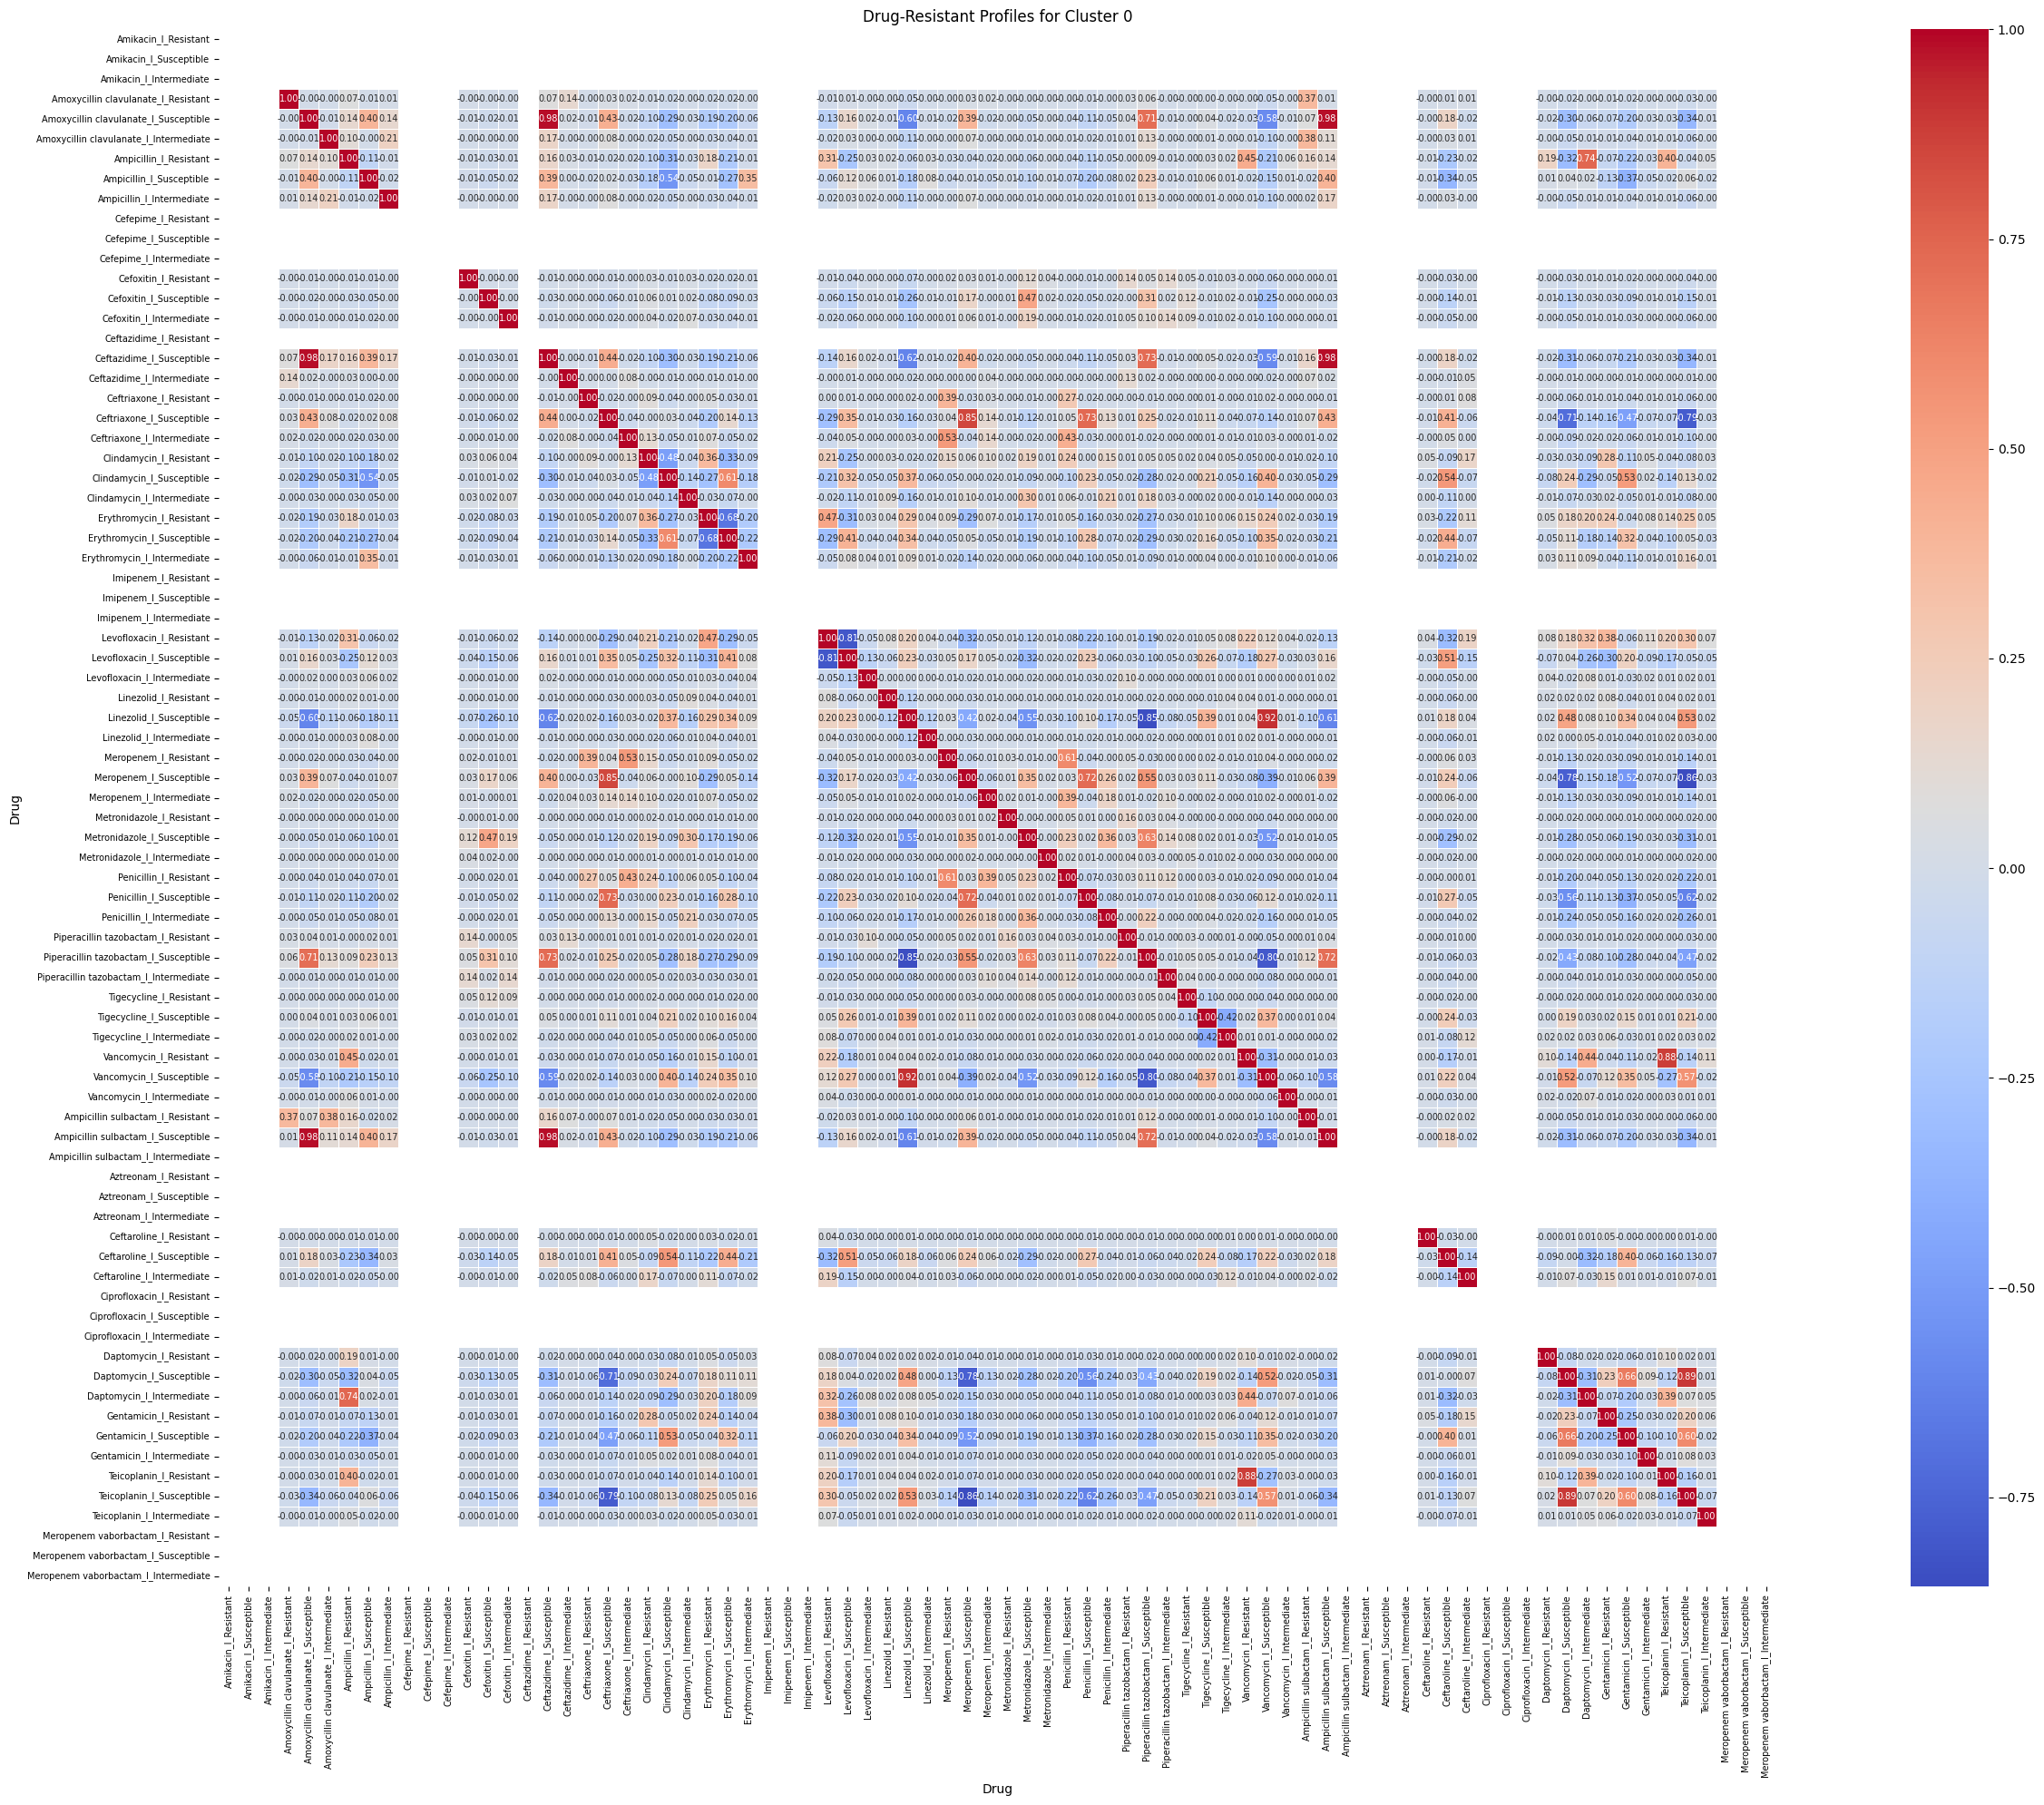

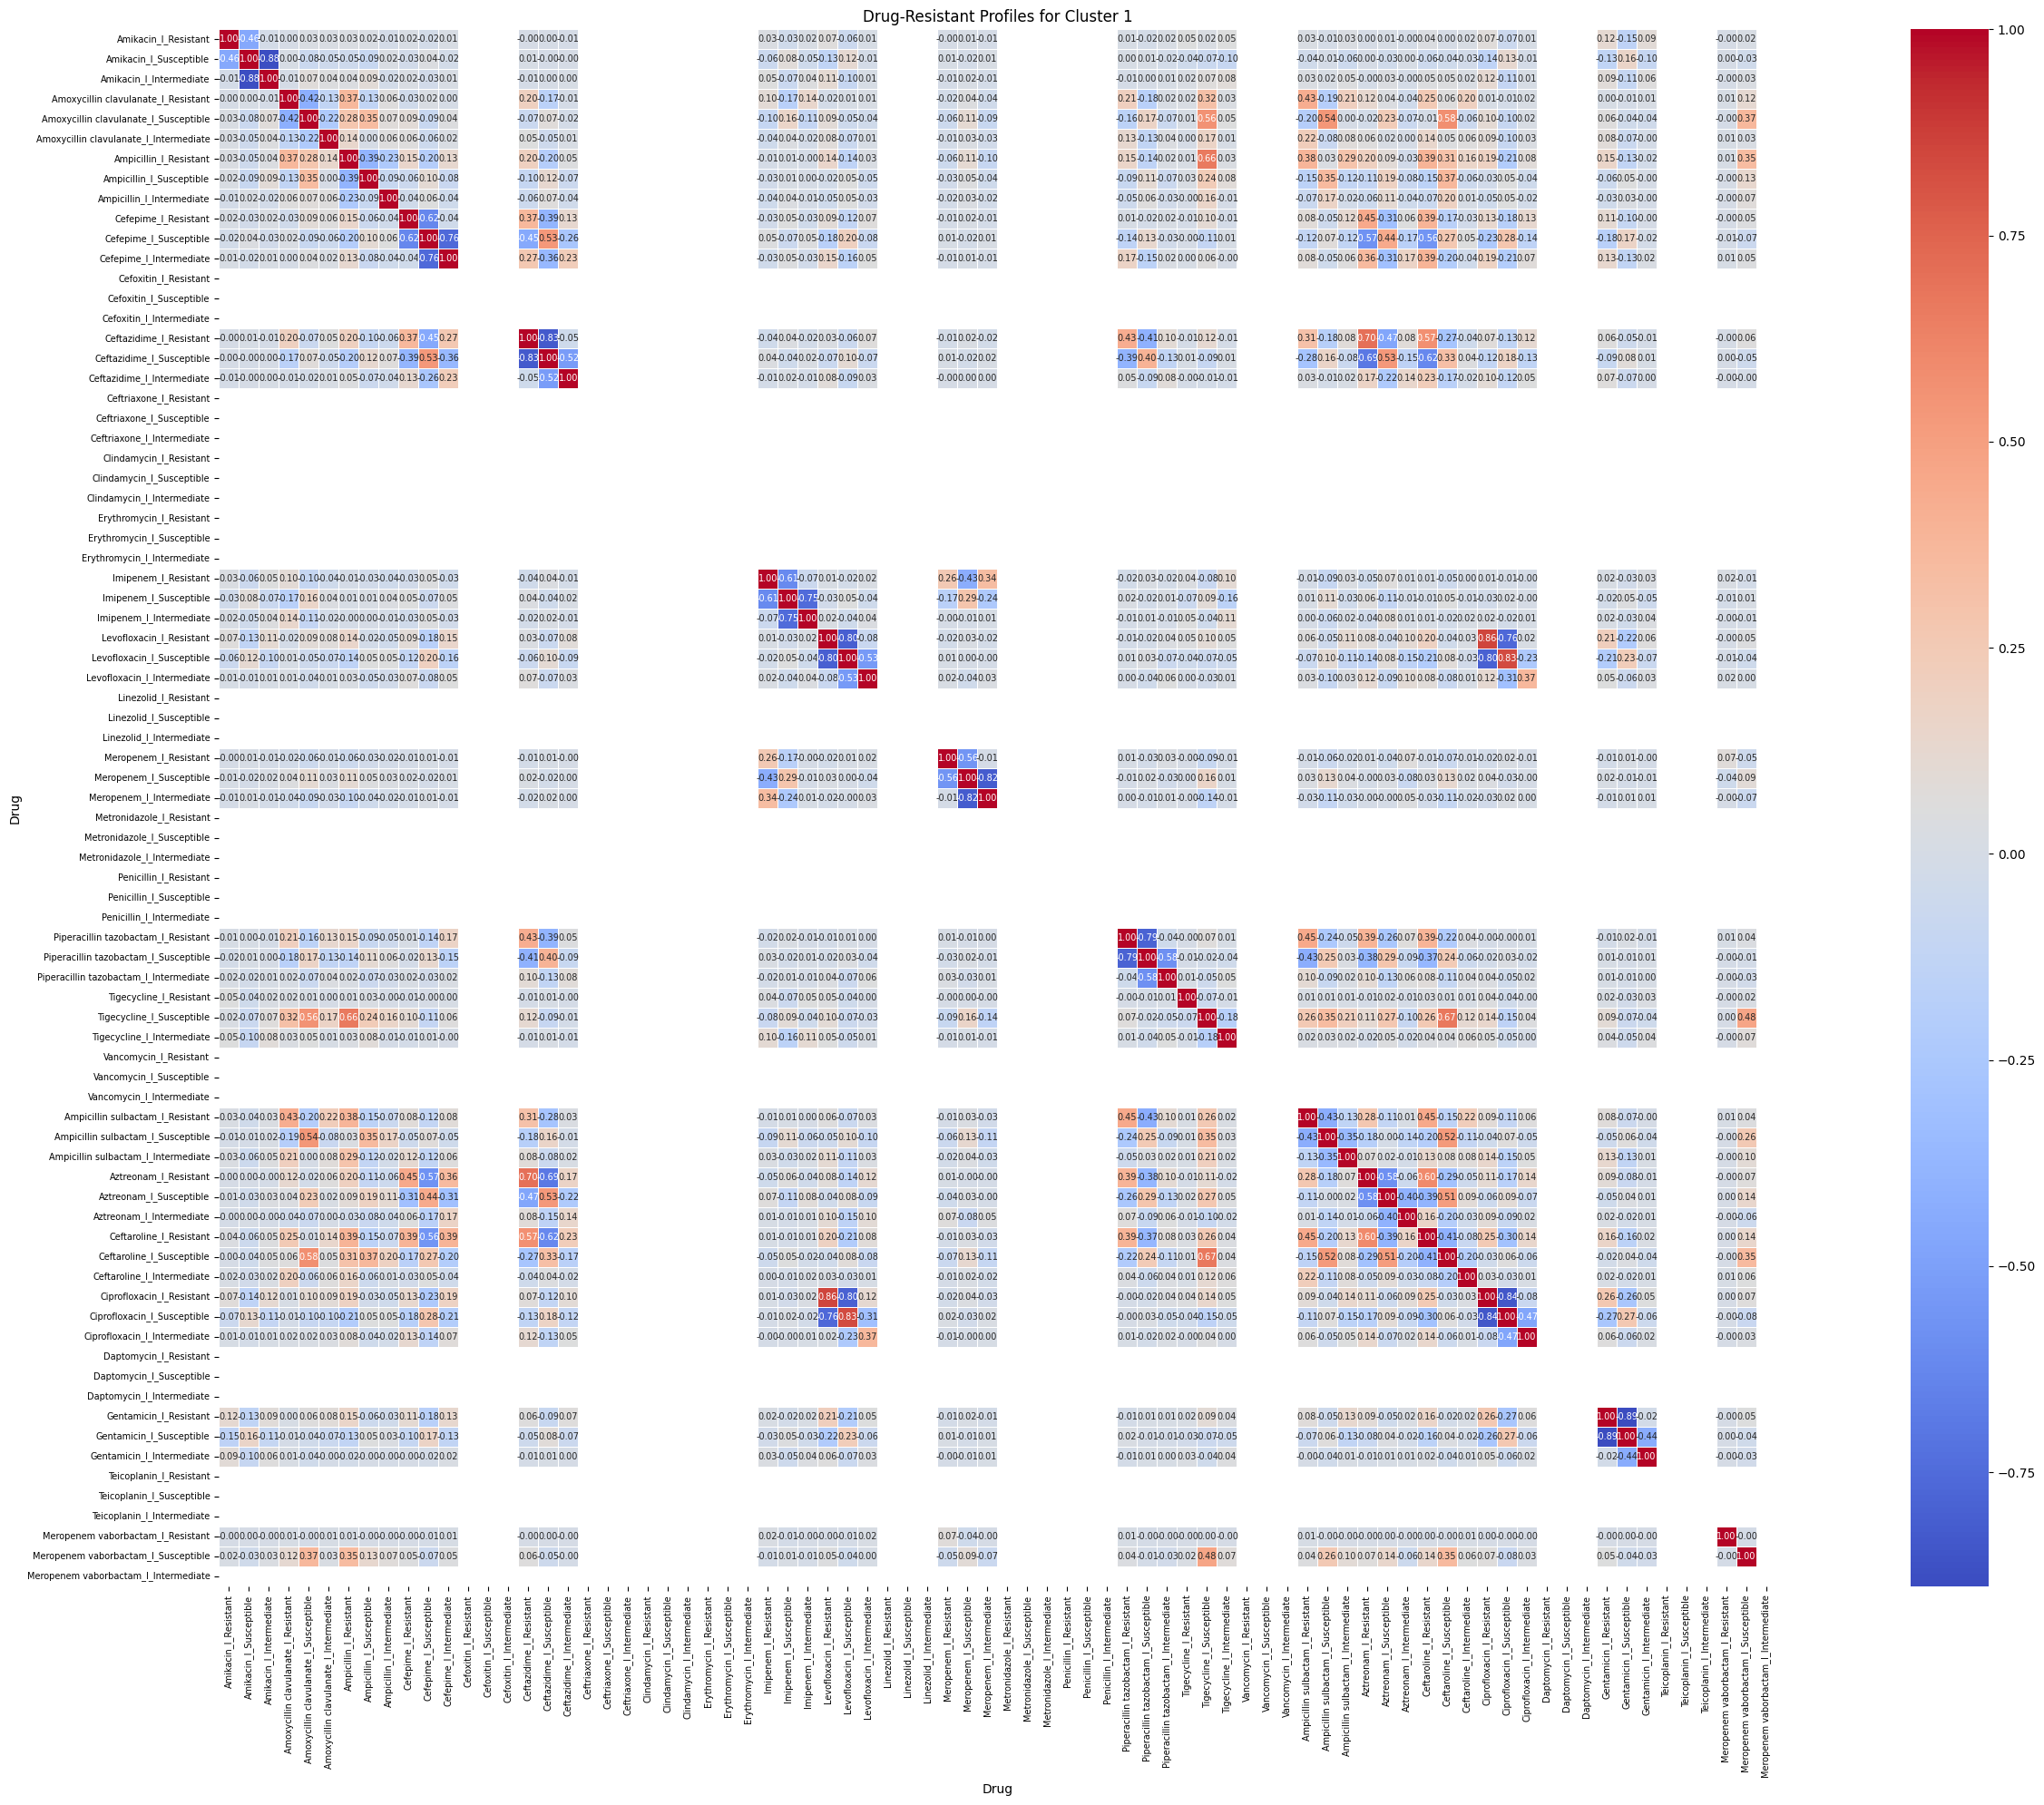

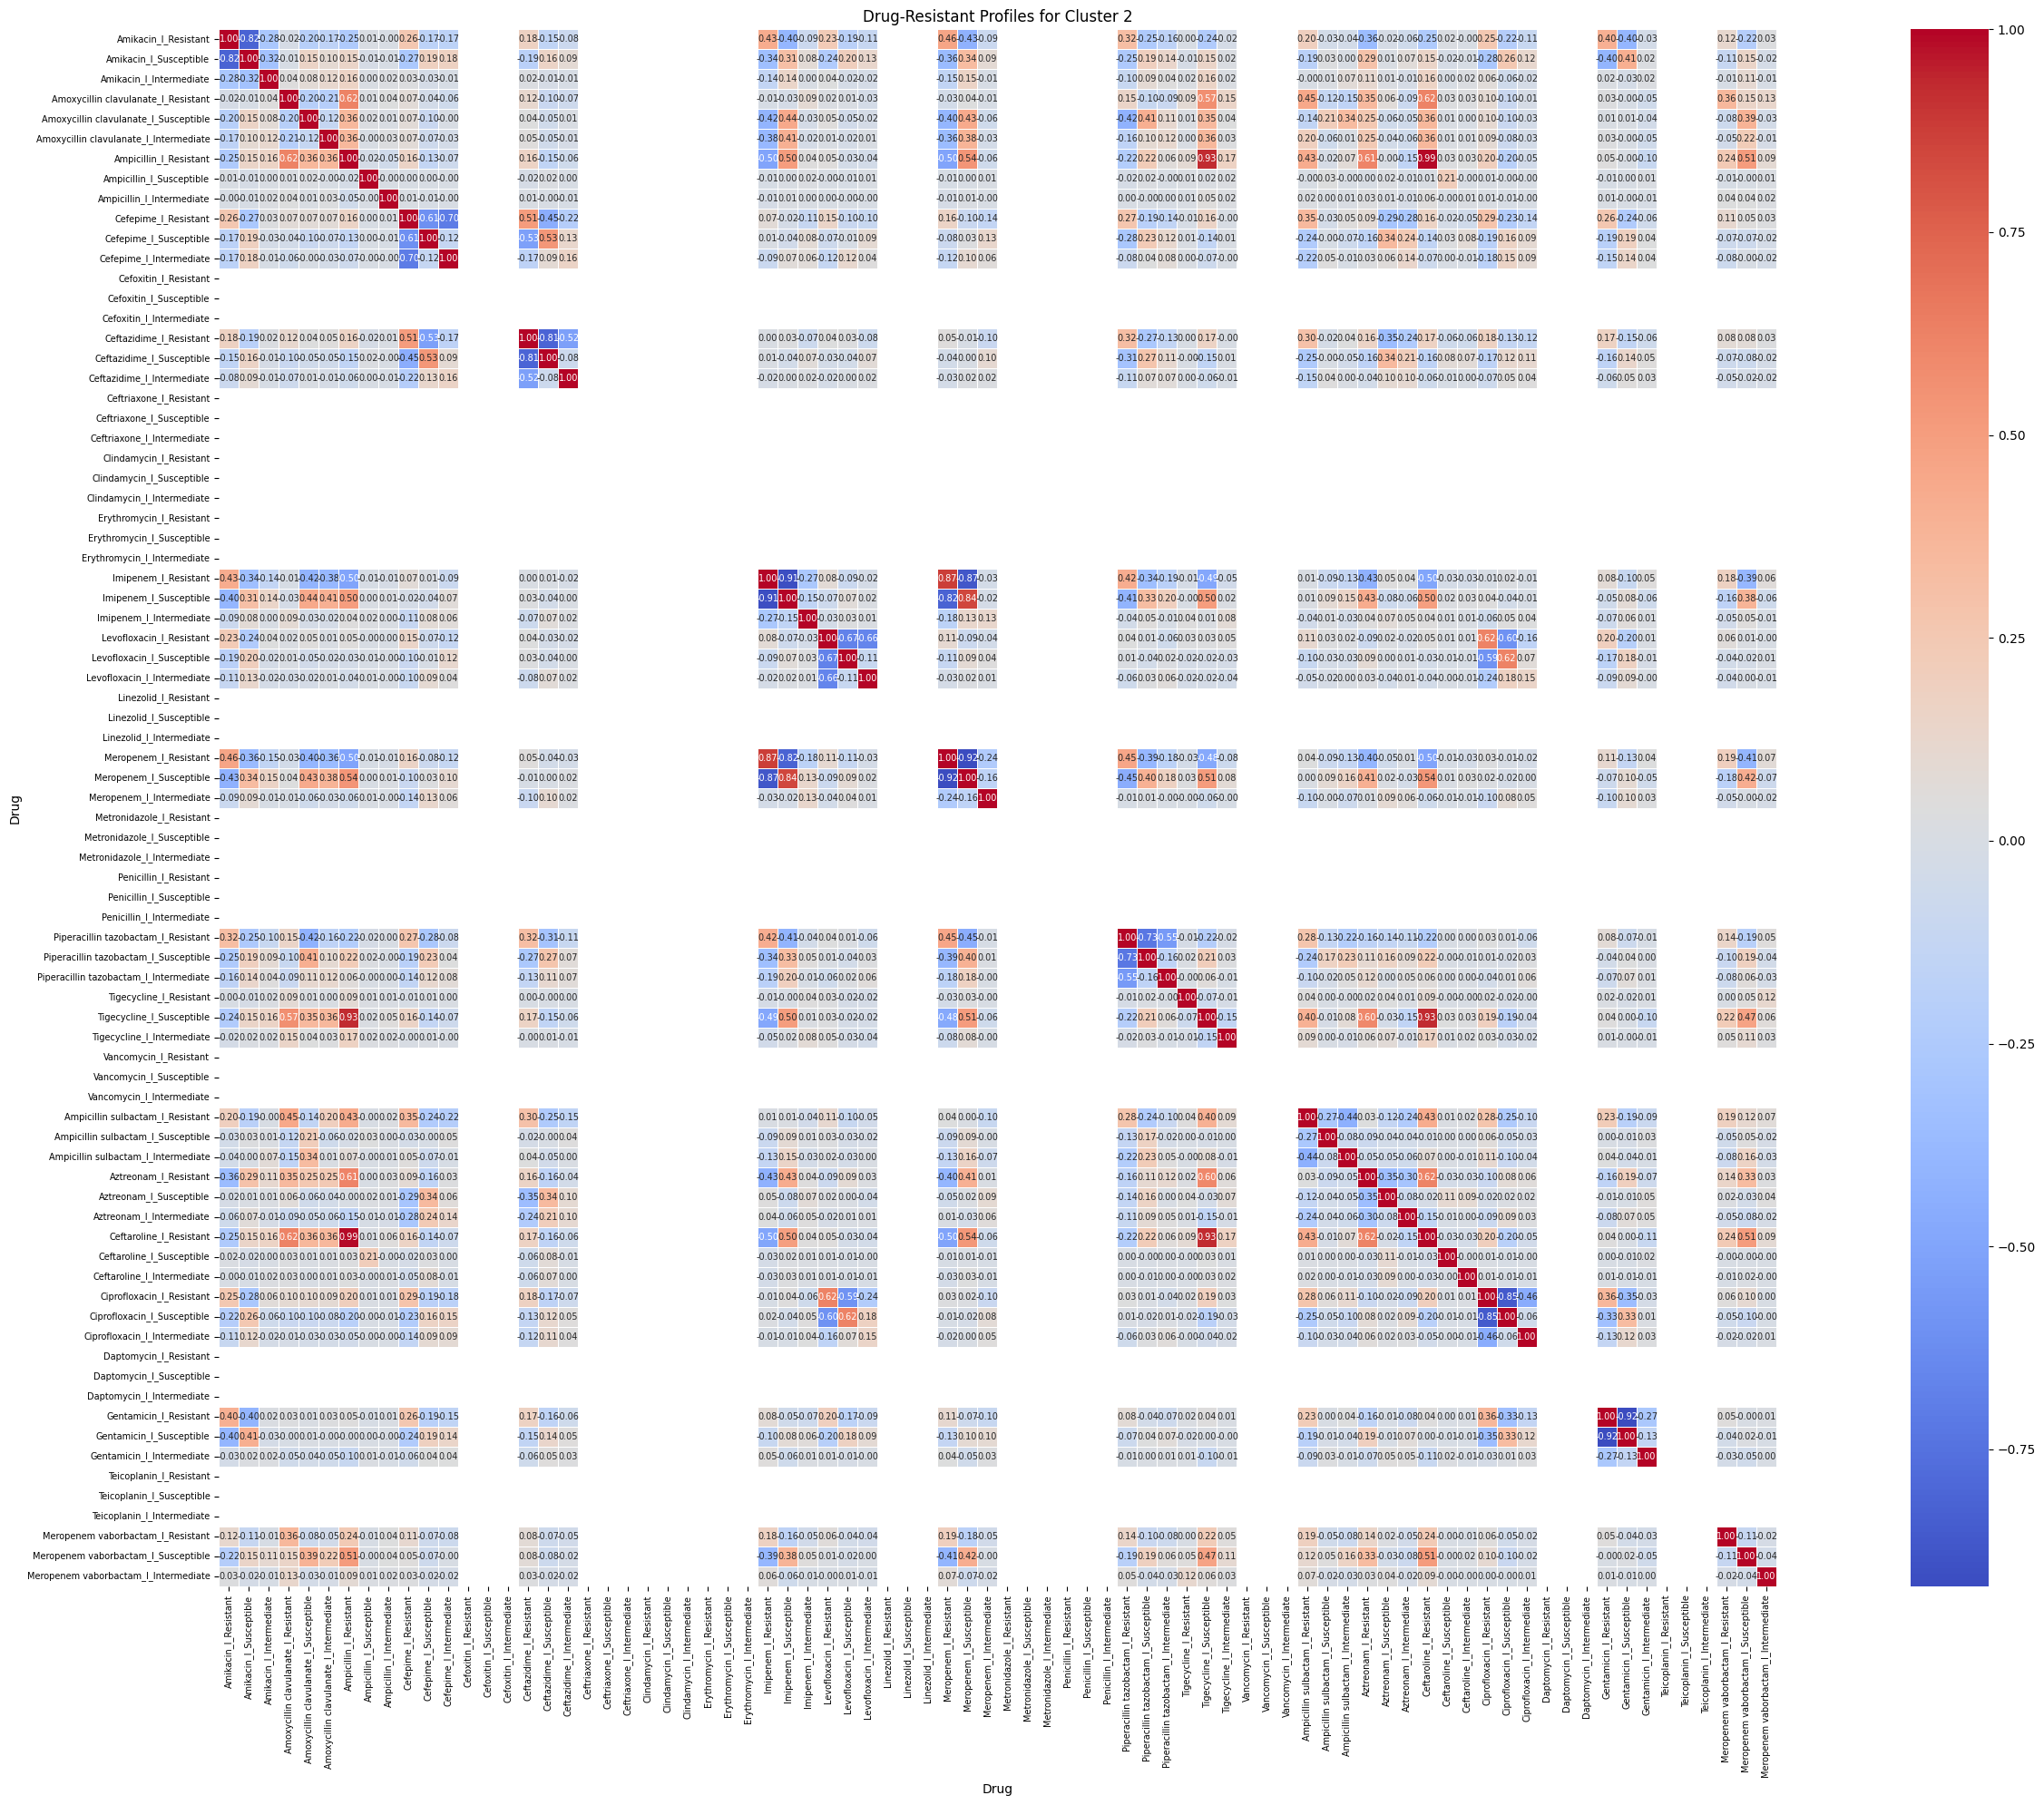

In [98]:
# Correlation Analysis
import random
import matplotlib.pyplot as plt
import seaborn as sns

# List of drugs with resistance, susceptible, and intermediate profiles
drugs_list = ['Amikacin', 'Amoxycillin clavulanate', 'Ampicillin', 'Azithromycin', 'Cefepime', 'Cefoxitin', 'Ceftazidime', 'Ceftriaxone', 'Clindamycin', 'Erythromycin', 'Imipenem', 'Levofloxacin', 'Linezolid', 'Meropenem', 'Metronidazole', 'Penicillin', 'Piperacillin tazobactam', 'Tigecycline', 'Vancomycin', 'Ampicillin sulbactam', 'Aztreonam', 'Ceftaroline', 'Ceftazidime avibactam', 'Ciprofloxacin', 'Colistin', 'Daptomycin', 'Gentamicin', 'Oxacillin', 'Teicoplanin', 'Trimethoprim sulfa', 'Meropenem vaborbactam']
data_with_clusters = pd.get_dummies(clusters_data)

# Create a list to store the selected drug resistance columns
selected_columns = []

# Iterate over the drugs list and check if each drug has the three combinations of resistance, susceptibility, and intermediate
for drug in drugs_list:
    resistance_column = drug + '_I_Resistant'
    susceptible_column = drug + '_I_Susceptible'
    intermediate_column = drug + '_I_Intermediate'

    # Check if all three columns exist in the dataset
    if all(column in data_with_clusters.columns for column in [resistance_column, susceptible_column, intermediate_column]):
        selected_columns.extend([resistance_column, susceptible_column, intermediate_column])
    else:
        print(f"Skipping {drug} as one or more columns are missing.")

# Select the relevant drug resistance columns for analysis
drug_resistance_columns = selected_columns

# Create a new DataFrame with the selected columns and cluster labels
resistance_data = data_with_clusters[['Cluster'] + drug_resistance_columns]

# Group the data by the cluster labels
grouped_data = resistance_data.groupby('Cluster')

# Iterate over each cluster and create a correlation matrix heatmap
for cluster, cluster_data in grouped_data:
    # Calculate the sum of resistance, susceptibility, and intermediate statuses for each drug in the current cluster
    drug_resistance_counts = cluster_data.drop('Cluster', axis=1).sum()

    # Calculate the correlation matrix
    correlation_matrix = cluster_data.drop('Cluster', axis=1).corr()
    # print(correlation_matrix)

    # Plot the correlation matrix heatmap
    plt.figure(figsize=(30, 20))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5, annot_kws={"fontsize": 7})

    plt.title(f'Drug-Resistant Profiles for Cluster {cluster}')
    plt.xlabel('Drug')
    plt.ylabel('Drug')
    plt.xticks(rotation=90, fontsize=7)
    plt.yticks(rotation=0, fontsize=7)
    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/amr/correlation_matrix.png")
    plt.show()
